## Introduction

Computational fluid dynamics (CFD) is a method for analyzing the behavior of a fluid in motion or analyzing the movement of a fluid. In order to depict how a gas or liquid travels and how it affects objects as it passes by, computational fluid dynamics (CFD) uses applied mathematics, physics, and computer software. The Navier-Stokes equations serve as the basis for computational fluid dynamics. These equations explain the relationship between a flowing fluid's velocity, pressure, temperature, and density.

### Navier-Stokes Equations

The Navier-Stokes equations are fundamental equations in fluid mechanics that describe the motion of fluid substances. They provide a mathematical framework for understanding how the velocity, pressure, temperature, and density of a fluid are related in a flowing system. The equations are named after Claude-Louis Navier and Sir George Gabriel Stokes, who made significant contributions to the understanding of fluid dynamics in the 19th century.

#### Continuity Equation

The continuity equation represents the principle of mass conservation in fluid flow. It states that the rate of change of mass within a control volume is equal to the net rate of flow of mass into or out of the control volume. Mathematically, it can be expressed as:

$
\frac{\partial \rho}{\partial t} + \nabla \cdot (\rho \mathbf{v}) = 0
$

where:
 - $\rho$ is the fluid density,
 - $\mathbf{v}$ is the velocity vector,
 - $\frac{\partial}{\partial t}$ denotes the partial derivative with respect to time
 - $\nabla \cdot$ represents the divergence operator.

In simpler terms, the continuity equation states that the rate of change of mass density with respect to time plus the divergence of the mass flux density $\rho \mathbf{v}$ is equal to zero. This equation ensures that mass is conserved within the fluid flow field.

#### Navier-Stokes Equation (Momentum Equation)

The Navier-Stokes equation describes the conservation of momentum for a fluid element and is derived from Newton's second law of motion. It takes into account the effects of viscosity and pressure gradients on fluid flow. The general form of the Navier-Stokes equation for incompressible flow is:

$\rho \left( \frac{\partial \mathbf{v}}{\partial t} + (\mathbf{v} \cdot \nabla) \mathbf{v} \right) = - \nabla p + \mu \nabla^2 \mathbf{v} + \mathbf{f} $

where:
- $\mathbf{v}$ is the velocity vector,
- $p$ is the pressure,
- $\mu$ is the dynamic viscosity of the fluid,
- $\nabla$ represents the gradient operator,
- $\nabla^{2}$ denotes the Laplacian operator,
- $\mathbf{f}$ represents external body forces acting on the fluid (such as gravity or electromagnetic forces).

The Navier-Stokes equation accounts for the acceleration of fluid particles, the effects of pressure gradients, and the dissipative effects of viscosity. It is a vector equation, with components in each direction of the flow.

Together, the continuity equation and the Navier-Stokes equation form a set of partial differential equations that govern the behavior of fluid flow in various physical systems. These equations are fundamental in computational fluid dynamics (CFD) for simulating and analyzing fluid flow phenomena in engineering and scientific applications.

### 12 Steps to Solve Navier-Stokes Equation

1. **1-D Linear Convection**: Solve the linear convection equation with a step-function initial condition and appropriate boundary conditions.

2. **1-D Nonlinear Convection**: Solve the nonlinear convection equation with the same initial condition and boundary conditions as in step 1.

3. **1-D Diffusion Equation**: Solve the diffusion equation with the step-function initial condition and appropriate boundary conditions.

4. **1-D Burgers' Equation**: Solve Burgers' equation with a saw-tooth initial condition and periodic boundary conditions.

5. **2-D Linear Convection**: Extend the solution to linear convection to two dimensions, using a square function initial condition and appropriate boundary conditions.

6. **2-D Nonlinear Convection**: Solve the two-dimensional nonlinear convection equation with the same initial condition and boundary conditions as in step 5.

7. **2-D Diffusion Equation**: Extend the solution to diffusion only to two dimensions, using the same initial condition and boundary conditions as in step 5.

8. **2-D Burgers' Equation**: Solve Burgers' equation in two dimensions with the same initial condition and boundary conditions as in step 5.

9. **2-D Laplace Equation**: Solve the Laplace equation with zero initial condition and both Neumann and Dirichlet boundary conditions.

10. **2-D Poisson Equation**: Solve the Poisson equation in two dimensions.

11. **Cavity Flow**: Solve the Navier-Stokes equation for cavity flow in two dimensions.

12. **Channel Flow**: Solve the Navier-Stokes equation for channel flow in two dimensions.

### Step 1: 1-D Linear Convection

The 1-D Linear Convection equation is the simplest, most basic model that can be used to learn something about CFD. It is surprising that this little equation can teach us so much! Here it is:

$$\frac{\partial u}{\partial t} + c \frac{\partial u}{\partial x} = 0$$

With given initial conditions (understood as a *wave*), the equation represents the propagation of that initial *wave* with speed $c$, without change of shape. Let the initial condition be $u(x,0)=u_0(x)$. Then the exact solution of the equation is $u(x,t)=u_0(x-ct)$.

Discretizing this equation in both space and time, using the Forward Difference scheme for the time derivative and the Backward Difference scheme for the space derivative, we obtain:

$$\frac{u_i^{n+1}-u_i^n}{\Delta t} + c \frac{u_i^n - u_{i-1}^n}{\Delta x} = 0 $$

Where $n$ and $n+1$ are two consecutive steps in time, while $i-1$ and $i$ are two neighboring points of the discretized $x$ coordinate. If there are given initial conditions, then the only unknown in this discretization is $u_i^{n+1}$.  We can solve for our unknown to get an equation that allows us to advance in time, as follows:

$$u_i^{n+1} = u_i^n - c \frac{\Delta t}{\Delta x}(u_i^n-u_{i-1}^n)$$

Now let's try implementing this in Python.  

We'll start by importing a few libraries to help us out.

* `numpy` is a library that provides a bunch of useful matrix operations akin to MATLAB
* `matplotlib` is a 2D plotting library that we will use to plot our results
* `time` and `sys` provide basic timing functions that we'll use to slow down animations for viewing


### Step 2: 1-D Nonlinear Convection 

The 1D convection equation is:

$$\frac{\partial u}{\partial t} + u \frac{\partial u}{\partial x} = 0$$

Instead of a constant factor $c$ multiplying the second term, now we have the solution $u$ multiplying it. Thus, the second term of the equation is now *nonlinear*. Using the same discretization as in Step 1 — forward difference in time and backward difference in space. Here is the discretized equation.

$$\frac{u_i^{n+1}-u_i^n}{\Delta t} + u_i^n \frac{u_i^n-u_{i-1}^n}{\Delta x} = 0$$

Solving for the only unknown term, $u_i^{n+1}$, yields:

$$u_i^{n+1} = u_i^n - u_i^n \frac{\Delta t}{\Delta x} (u_i^n - u_{i-1}^n)$$

### Step 3: 1-D Diffusion Equation

The one-dimensional diffusion equation is:

$$\frac{\partial u}{\partial t}= \nu \frac{\partial^2 u}{\partial x^2}$$

The first thing to notice is that —unlike the previous two simple equations studied— this equation has a second-order derivative.

Discretizing:$\frac{\partial ^2 u}{\partial x^2}$

The second-order derivative can be represented geometrically as the line tangent to the curve given by the first derivative.  The second-order derivative is discretized with a Central Difference scheme: a combination of Forward Difference and Backward Difference of the first derivative.  Considering the Taylor expansion of $u_{i+1}$ and $u_{i-1}$ around $u_i$:

$u_{i+1} = u_i + \Delta x \frac{\partial u}{\partial x}\bigg|_i + \frac{\Delta x^2}{2} \frac{\partial ^2 u}{\partial x^2}\bigg|_i + \frac{\Delta x^3}{3!} \frac{\partial ^3 u}{\partial x^3}\bigg|_i + O(\Delta x^4)$

$u_{i-1} = u_i - \Delta x \frac{\partial u}{\partial x}\bigg|_i + \frac{\Delta x^2}{2} \frac{\partial ^2 u}{\partial x^2}\bigg|_i - \frac{\Delta x^3}{3!} \frac{\partial ^3 u}{\partial x^3}\bigg|_i + O(\Delta x^4)$

Adding these two expansions, the odd-numbered derivative terms cancel each other out. Neglecting any terms of $O(\Delta x^4)$ or higher, the sum of these two expansions can be rearranged to solve for the second-derivative:

$$\frac{\partial ^2 u}{\partial x^2}=\frac{u_{i+1}-2u_{i}+u_{i-1}}{\Delta x^2} + O(\Delta x^2)$$

#### Back to Step 3

The discretized version of the diffusion equation in 1D:

$$\frac{u_{i}^{n+1}-u_{i}^{n}}{\Delta t}=\nu\frac{u_{i+1}^{n}-2u_{i}^{n}+u_{i-1}^{n}}{\Delta x^2}$$

For the initial condition, the only unknown is $u_{i}^{n+1}$, so re-arranging the equation for solving the unknown:

$$u_{i}^{n+1}=u_{i}^{n}+\frac{\nu\Delta t}{\Delta x^2}(u_{i+1}^{n}-2u_{i}^{n}+u_{i-1}^{n})$$

The above discrete equation allows writing a program to advance a solution in time. An initial condition is needed. Continuing the use of the hat function, at $t=0$, $u=2$ in the interval $0.5\le x\le 1$ and $u=1$ everywhere else.


### Step 4: 1-D Burgers' Equation

Burgers' equation in one spatial dimension is:

$$\frac{\partial u}{\partial t} + u \frac{\partial u}{\partial x} = \nu \frac{\partial ^2u}{\partial x^2}$$

This equation combines non-linear convection and diffusion, offering valuable insights despite its simplicity.

Discretization of Burgers' equation can be achieved using the methods detailed in Steps 1 to 3. Employing forward difference for time, backward difference for space, and a 2nd-order method for the second derivatives, we arrive at:

$$\frac{u_i^{n+1}-u_i^n}{\Delta t} + u_i^n \frac{u_i^n - u_{i-1}^n}{\Delta x} = \nu \frac{u_{i+1}^n - 2u_i^n + u_{i-1}^n}{\Delta x^2}$$

Upon obtaining the initial condition, the only unknown is $u_i^{n+1}$. Time stepping can be performed as follows:

$$u_i^{n+1} = u_i^n - u_i^n \frac{\Delta t}{\Delta x} (u_i^n - u_{i-1}^n) + \nu \frac{\Delta t}{\Delta x^2}(u_{i+1}^n - 2u_i^n + u_{i-1}^n)$$


#### Initial and Boundary Conditions

To examine some interesting properties of Burgers' equation, different initial and boundary conditions are utilized compared to previous steps.

The initial condition for this problem is:

\begin{align*}
u &= -\frac{2 \nu}{\phi} \frac{\partial \phi}{\partial x} + 4 \\
\phi &= \exp \left(\frac{-x^2}{4 \nu} \right) + \exp \left(\frac{-(x-2 \pi)^2}{4 \nu} \right)
\end{align*}

This has an analytical solution given by:

\begin{align*}
u &= -\frac{2 \nu}{\phi} \frac{\partial \phi}{\partial x} + 4 \\
\phi &= \exp \left(\frac{-(x-4t)^2}{4 \nu (t+1)} \right) + \exp \left(\frac{-(x-4t -2 \pi)^2}{4 \nu(t+1)} \right)
\end{align*}

The boundary condition is:

$$u(0) = u(2\pi)$$

This is referred to as a *periodic* boundary condition.


### Step 5: 2-D Linear Convection

The partial differential equation (PDE) governing 2-D Linear Convection is written as:

$$\frac{\partial u}{\partial t}+c\frac{\partial u}{\partial x} + c\frac{\partial u}{\partial y} = 0$$

This is the exact same form as with 1-D Linear Convection, except that we now have two spatial dimensions to account for as we step forward in time.  

Again, the timestep will be discretized as a forward difference, and both spatial steps will be discretized as backward differences.  

With 1-D implementations, $i$ subscripts were used to denote movement in space (e.g., $u_{i}^n-u_{i-1}^n$). Now that there are two dimensions to account for, a second subscript, $j$, is added to account for all the information in the regime.  

Here, $i$ will again be used as the index for the $x$ values, and the $j$ subscript will be added to track the $y$ values.  

With that in mind, the discretization of the PDE should be relatively straightforward:

$$\frac{u_{i,j}^{n+1}-u_{i,j}^n}{\Delta t} + c\frac{u_{i, j}^n-u_{i-1,j}^n}{\Delta x} + c\frac{u_{i,j}^n-u_{i,j-1}^n}{\Delta y}=0$$

As before, solve for the only unknown:

$$u_{i,j}^{n+1} = u_{i,j}^n-c \frac{\Delta t}{\Delta x}(u_{i,j}^n-u_{i-1,j}^n)-c \frac{\Delta t}{\Delta y}(u_{i,j}^n-u_{i,j-1}^n)$$

This equation will be solved with the following initial conditions:

$$u(x,y) = \begin{cases}
\begin{matrix}
2\ \text{for} & 0.5 \leq x, y \leq 1 \cr
1\ \text{for} & \text{everywhere else}\end{matrix}\end{cases}$$

and boundary conditions:

$$u = 1\ \text{for } \begin{cases}
\begin{matrix}
x =  0,\ 2 \cr
y =  0,\ 2 \end{matrix}\end{cases}$$


### Step 6: 2-D Convection
    
Now the 2D Convection problem is solved, represented by the pair of coupled partial differential equations below:

$$\frac{\partial u}{\partial t} + u \frac{\partial u}{\partial x} + v \frac{\partial u}{\partial y} = 0$$

$$\frac{\partial v}{\partial t} + u \frac{\partial v}{\partial x} + v \frac{\partial v}{\partial y} = 0$$

Discretizing these equations using the methods applied previously yields:

$$\frac{u_{i,j}^{n+1}-u_{i,j}^n}{\Delta t} + u_{i,j}^n \frac{u_{i,j}^n-u_{i-1,j}^n}{\Delta x} + v_{i,j}^n \frac{u_{i,j}^n-u_{i,j-1}^n}{\Delta y} = 0$$

$$\frac{v_{i,j}^{n+1}-v_{i,j}^n}{\Delta t} + u_{i,j}^n \frac{v_{i,j}^n-v_{i-1,j}^n}{\Delta x} + v_{i,j}^n \frac{v_{i,j}^n-v_{i,j-1}^n}{\Delta y} = 0$$

Rearranging both equations, we solve for $u_{i,j}^{n+1}$ and $v_{i,j}^{n+1}$, respectively.  Note that these equations are also coupled.  

$$u_{i,j}^{n+1} = u_{i,j}^n - u_{i,j} \frac{\Delta t}{\Delta x} (u_{i,j}^n-u_{i-1,j}^n) - v_{i,j}^n \frac{\Delta t}{\Delta y} (u_{i,j}^n-u_{i,j-1}^n)$$

$$v_{i,j}^{n+1} = v_{i,j}^n - u_{i,j} \frac{\Delta t}{\Delta x} (v_{i,j}^n-v_{i-1,j}^n) - v_{i,j}^n \frac{\Delta t}{\Delta y} (v_{i,j}^n-v_{i,j-1}^n)$$

#### Initial Conditions

The initial conditions are the same that we used for 1D convection, applied in both the x and y directions.  

$$u,\ v\ = \begin{cases}\begin{matrix}
2 & \text{for } x,y \in (0.5, 1)\times(0.5,1) \cr
1 & \text{everywhere else}
\end{matrix}\end{cases}$$

#### Boundary Conditions

The boundary conditions hold u and v equal to 1 along the boundaries of the grid.

$$u = 1,\ v = 1 \text{ for } \begin{cases} \begin{matrix}x=0,2\cr y=0,2 \end{matrix}\end{cases}$$


### Step 7: 2D Diffusion

The 2D diffusion equation is expressed as:

$$\frac{\partial u}{\partial t} = \nu \frac{\partial ^2 u}{\partial x^2} + \nu \frac{\partial ^2 u}{\partial y^2}$$

For discretization, the same approach as in Step 3 for 1-D diffusion is employed, utilizing forward difference in time and second-order derivatives in both spatial dimensions:

$$\frac{u_{i,j}^{n+1} - u_{i,j}^n}{\Delta t} = \nu \frac{u_{i+1,j}^n - 2 u_{i,j}^n + u_{i-1,j}^n}{\Delta x^2} + \nu \frac{u_{i,j+1}^n-2 u_{i,j}^n + u_{i,j-1}^n}{\Delta y^2}$$

Subsequently, the equation is rearranged to solve for $u_{i,j}^{n+1}$:

$$
\begin{split}
u_{i,j}^{n+1} = u_{i,j}^n &+ \frac{\nu \Delta t}{\Delta x^2}(u_{i+1,j}^n - 2 u_{i,j}^n + u_{i-1,j}^n) \\
&+ \frac{\nu \Delta t}{\Delta y^2}(u_{i,j+1}^n-2 u_{i,j}^n + u_{i,j-1}^n)
\end{split}
$$


### Step 8: Burgers' Equation in 2D
    
Burgers' equation can generate discontinuous solutions from a smooth initial condition, i.e., can develop "shocks." We want to see this in two dimensions now!

Here is our coupled set of PDEs:

$$
\frac{\partial u}{\partial t} + u \frac{\partial u}{\partial x} + v \frac{\partial u}{\partial y} = \nu \; \left(\frac{\partial ^2 u}{\partial x^2} + \frac{\partial ^2 u}{\partial y^2}\right)$$

$$
\frac{\partial v}{\partial t} + u \frac{\partial v}{\partial x} + v \frac{\partial v}{\partial y} = \nu \; \left(\frac{\partial ^2 v}{\partial x^2} + \frac{\partial ^2 v}{\partial y^2}\right)$$

We know how to discretize each term: we've done it before.

$$
\begin{split}
& \frac{u_{i,j}^{n+1} - u_{i,j}^n}{\Delta t} + u_{i,j}^n \frac{u_{i,j}^n-u_{i-1,j}^n}{\Delta x} + v_{i,j}^n \frac{u_{i,j}^n - u_{i,j-1}^n}{\Delta y} = \\
& \qquad \nu \left( \frac{u_{i+1,j}^n - 2u_{i,j}^n+u_{i-1,j}^n}{\Delta x^2} + \frac{u_{i,j+1}^n - 2u_{i,j}^n + u_{i,j-1}^n}{\Delta y^2} \right)
\end{split}
$$

$$
\begin{split}
& \frac{v_{i,j}^{n+1} - v_{i,j}^n}{\Delta t} + u_{i,j}^n \frac{v_{i,j}^n-v_{i-1,j}^n}{\Delta x} + v_{i,j}^n \frac{v_{i,j}^n - v_{i,j-1}^n}{\Delta y} = \\
& \qquad \nu \left( \frac{v_{i+1,j}^n - 2v_{i,j}^n+v_{i-1,j}^n}{\Delta x^2} + \frac{v_{i,j+1}^n - 2v_{i,j}^n + v_{i,j-1}^n}{\Delta y^2} \right)
\end{split}
$$

And now, we will rearrange each of these equations for the only unknown: the two components $u,v$ of the solution at the next time step:
    
$$
\begin{split}
u_{i,j}^{n+1} = & u_{i,j}^n - \frac{\Delta t}{\Delta x} u_{i,j}^n (u_{i,j}^n - u_{i-1,j}^n)  - \frac{\Delta t}{\Delta y} v_{i,j}^n (u_{i,j}^n - u_{i,j-1}^n) \\
&+ \frac{\nu \Delta t}{\Delta x^2}(u_{i+1,j}^n-2u_{i,j}^n+u_{i-1,j}^n) + \frac{\nu \Delta t}{\Delta y^2} (u_{i,j+1}^n - 2u_{i,j}^n + u_{i,j-1}^n)
\end{split}
$$

$$
\begin{split}
v_{i,j}^{n+1} = & v_{i,j}^n - \frac{\Delta t}{\Delta x} u_{i,j}^n (v_{i,j}^n - v_{i-1,j}^n) - \frac{\Delta t}{\Delta y} v_{i,j}^n (v_{i,j}^n - v_{i,j-1}^n) \\
&+ \frac{\nu \Delta t}{\Delta x^2}(v_{i+1,j}^n-2v_{i,j}^n+v_{i-1,j}^n) + \frac{\nu \Delta t}{\Delta y^2} (v_{i,j+1}^n - 2v_{i,j}^n + v_{i,j-1}^n)
\end{split}
$$

### Step 9: 2D Laplace Equation

Laplace's equation in 2D:

$$\frac{\partial ^2 p}{\partial x^2} + \frac{\partial ^2 p}{\partial y^2} = 0$$

We know how to discretize a 2nd order derivative. But think about this for a minute — Laplace's equation has the features typical of diffusion phenomena. For this reason, it has to be discretized with *central differences*, so that the discretization is consistent with the physics we want to simulate. 

The discretized equation is:

$$\frac{p_{i+1, j}^n - 2p_{i,j}^n + p_{i-1,j}^n}{\Delta x^2} + \frac{p_{i,j+1}^n - 2p_{i,j}^n + p_{i, j-1}^n}{\Delta y^2} = 0$$

Notice that the Laplace Equation does not have a time dependence — there is no $p^{n+1}$.  Instead of tracking a wave through time (like in the previous steps), the Laplace equation calculates the equilibrium state of a system under the supplied boundary conditions.  

If you have taken coursework in Heat Transfer, you will recognize the Laplace Equation as the steady-state heat equation.  

Instead of calculating where the system will be at some time $t$, we will iteratively solve for $p_{i,j}^n$ until it meets a condition that we specify.  The system will reach equilibrium only as the number of iterations tends to $\infty$, but we can approximate the equilibrium state by iterating until the change between one iteration and the next is *very* small.  

Let's rearrange the discretized equation, solving for $p_{i,j}^n$:

$$p_{i,j}^n = \frac{\Delta y^2(p_{i+1,j}^n+p_{i-1,j}^n)+\Delta x^2(p_{i,j+1}^n + p_{i,j-1}^n)}{2(\Delta x^2 + \Delta y^2)}$$

Using second-order central-difference schemes in both directions is the most widely applied method for the Laplace operator. It is also known as the **five-point difference operator**, alluding to its stencil.

We are going to solve Laplace's equation numerically by assuming an initial state of $p=0$ everywhere. Then we add boundary conditions as follows:

$p=0$ at $x=0$

$p=y$ at $x=2$

$\frac{\partial p}{\partial y}=0$ at $y=0, \ 1$

Under these conditions, there is an analytical solution for Laplace's equation:

$$p(x,y)=\frac{x}{4}-4\sum_{n=1,odd}^{\infty}\frac{1}{(n\pi)^2\sinh2n\pi}\sinh n\pi x\cos n\pi y$$

### Step 10: 2D Poisson Equation

Poisson's equation is obtained from adding a source term to the right-hand-side of Laplace's equation:

$$\frac{\partial ^2 p}{\partial x^2} + \frac{\partial ^2 p}{\partial y^2} = b$$

So, unlinke the Laplace equation, there is some finite value inside the field that affects the solution. Poisson's equation acts to "relax" the initial sources in the field.

In discretized form, this looks almost the same as [Step 9](./12_Step_9.ipynb), except for the source term:

$$\frac{p_{i+1,j}^{n}-2p_{i,j}^{n}+p_{i-1,j}^{n}}{\Delta x^2}+\frac{p_{i,j+1}^{n}-2 p_{i,j}^{n}+p_{i,j-1}^{n}}{\Delta y^2}=b_{i,j}^{n}$$

As before, we rearrange this so that we obtain an equation for $p$ at point $i,j$. Thus, we obtain:

$$p_{i,j}^{n}=\frac{(p_{i+1,j}^{n}+p_{i-1,j}^{n})\Delta y^2+(p_{i,j+1}^{n}+p_{i,j-1}^{n})\Delta x^2-b_{i,j}^{n}\Delta x^2\Delta y^2}{2(\Delta x^2+\Delta y^2)}$$

We will solve this equation by assuming an initial state of $p=0$ everywhere, and applying boundary conditions as follows:

$p=0$ at $x=0, \ 2$ and $y=0, \ 1$

and the source term consists of two initial spikes inside the domain, as follows:

$b_{i,j}=100$ at $i=\frac{1}{4}nx, j=\frac{1}{4}ny$

$b_{i,j}=-100$ at $i=\frac{3}{4}nx, j=\frac{3}{4}ny$

$b_{i,j}=0$ everywhere else.

The iterations will advance in pseudo-time to relax the initial spikes. The relaxation under Poisson's equation gets slower and slower as they progress.


### Step 11: Cavity Flow with Navier–Stokes

The system of differential equations: two equations for the velocity components $u,v$ and one equation for pressure:

$$\frac{\partial u}{\partial t}+u\frac{\partial u}{\partial x}+v\frac{\partial u}{\partial y} = -\frac{1}{\rho}\frac{\partial p}{\partial x}+\nu \left(\frac{\partial^2 u}{\partial x^2}+\frac{\partial^2 u}{\partial y^2} \right) $$


$$\frac{\partial v}{\partial t}+u\frac{\partial v}{\partial x}+v\frac{\partial v}{\partial y} = -\frac{1}{\rho}\frac{\partial p}{\partial y}+\nu\left(\frac{\partial^2 v}{\partial x^2}+\frac{\partial^2 v}{\partial y^2}\right) $$

$$\frac{\partial^2 p}{\partial x^2}+\frac{\partial^2 p}{\partial y^2} = -\rho\left(\frac{\partial u}{\partial x}\frac{\partial u}{\partial x}+2\frac{\partial u}{\partial y}\frac{\partial v}{\partial x}+\frac{\partial v}{\partial y}\frac{\partial v}{\partial y} \right)$$


### Step 12: Channel Flow with Navier–Stokes

The only difference between this final step and Step 11 is that we are going to add a source term to the $u$-momentum equation, to mimic the effect of a pressure-driven channel flow. Here are our modified Navier–Stokes equations:

$$\frac{\partial u}{\partial t}+u\frac{\partial u}{\partial x}+v\frac{\partial u}{\partial y}=-\frac{1}{\rho}\frac{\partial p}{\partial x}+\nu\left(\frac{\partial^2 u}{\partial x^2}+\frac{\partial^2 u}{\partial y^2}\right)+F$$

$$\frac{\partial v}{\partial t}+u\frac{\partial v}{\partial x}+v\frac{\partial v}{\partial y}=-\frac{1}{\rho}\frac{\partial p}{\partial y}+\nu\left(\frac{\partial^2 v}{\partial x^2}+\frac{\partial^2 v}{\partial y^2}\right)$$

$$\frac{\partial^2 p}{\partial x^2}+\frac{\partial^2 p}{\partial y^2}=-\rho\left(\frac{\partial u}{\partial x}\frac{\partial u}{\partial x}+2\frac{\partial u}{\partial y}\frac{\partial v}{\partial x}+\frac{\partial v}{\partial y}\frac{\partial v}{\partial y}\right)
$$

## Objectives

1. To provide a detailed description of the computational fluid dynamics (CFD) modeling process employed in solving the 12-step Navier-Stokes equations.
2. To demonstrate the application of numerical techniques for solving each step of the Navier-Stokes equations.
3. To analyze the results obtained from the simulations and interpret the physical implications of the obtained data.
4. To present a comprehensive overview of the methodologies used for each step of the modeling process.
5. To showcase the effectiveness of the implemented numerical techniques in accurately simulating fluid dynamics phenomena.
6. To analyse the results and interpret the physical implications of the simulation.

## Methodology

### Step 1: 1-D Linear Convection

The initial condition for Equation 4 is \( u(x, 0) = u_0(x) \). The exact solution is then obtained as shown in Equation 5. Employing the Forward Difference scheme for the time derivative and the Backward Difference method for the space derivative, the supplied equations are discretized in both space and time. Equation 6 allows us to solve for the unknown to enable time evolution. Necessary libraries such as `matplotlib`, `scipy`, and `numpy` are imported, and variables and constants are defined accordingly. Using `np.array`, velocity and \( u \) arrays are generated. An operation on Equation 6 is performed for each element of the array \( u \), and the outcome is stored in a new array called \( u_n \), serving as the answer for the following time-step. Matplotlib subplots are used to plot the required plots, displaying the velocity results \( u \) using the calculated variable and the space grid created with `np.linspace`.

### Step 2: 1-D Nonlinear Convection

The 1D nonlinear convection equation differs from linear convection in that the nonlinear convection wave moves with a variable speed instead of a constant speed. The second term is now multiplied by the solution \( u \) rather than a constant factor \( c \), rendering the equation's second term nonlinear. Equation 19 is derived using the same discretization as in Step 1, employing forward difference in time and backward difference in space. Matplotlib subplots are used to plot the required plots following the same steps as before.

### Step 3: 1-D Diffusion Equation

Equation 20 represents the one-dimensional diffusion equation. Geometrically, the second-order derivative can be illustrated as the line tangent to the curve produced by the first derivative. Discretizing the second-order derivative with a Central Difference scheme, which combines the Forward Difference and Backward Difference of the first derivative, is undertaken. Equation 21 presents the discretized diffusion equation in 1D. Initialization is performed, and necessary plots are created using Matplotlib subplots, displaying the calculated variable against the space grid created with `np.linspace`.

### Step 4: 1-D Burger’s Equation

Burgers' equation appears in one spatial dimension as shown in Equation 26, combining diffusion and non-linear convection. Discretization is conducted using techniques described in Steps 1 through 3, utilizing forward difference for time, backward difference for space, and a second-order technique for the second derivatives. Notably, periodic boundary conditions are applied in Step 4. The problem setup is completed, and necessary plots are generated using Matplotlib subplots, showcasing the calculated variable against the space grid created with `np.linspace`.

### Step 5: 2-D Linear Convection

Step 5 involves discretizing the 2D linear convection equation and applying the initial and boundary layer conditions to solve them. Implementation utilizes various array functions from the numpy library, and a for loop is employed to iterate across a number of time steps. Finally, Axes3D from mpl_toolkits.mplot3d is utilized to plot the required results.

### Step 6: 2-D Nonlinear Convection
2D Convection, represented by the pair of coupled partial differential equations is solved in this
step. Here too, we discretize the equation and apply the initial and boundary layer conditions to
solve them. All the other steps implemented are similar to step 5.

### Step 7: 2-D Diffusion Equation
The 2D diffusion equation is solved in this step. This step is similar to step 3 where the 1D
diffusion equation is solved. Again, we discretize the 2D diffusion equation and apply the initial
and boundary layer conditions to solve them. All the other steps implemented are similar to step
5.

### Step 8: 2-D Burgers’ Equation
The Burgers' equation generates discontinuous solutions from a smooth initial condition.
In order to see this effect, we discretize our coupled set of PDE’s and solve for the unknown
components u and v. The steps implemented to achieve these results are the same as in the
previous step. Axes 3D from mpl_toolkits.mplot3d is used to plot the required results.

### Step 9: 2-D Laplace Equation
This step implements the 2D Laplace equation. Laplace's equation has the features typical of
diffusion phenomena. Therefore, we use the central difference formula to discretize it.The
Laplace Equation does not have a time dependence. Instead of tracking a wave through time, it
calculates the equilibrium state of a system under the applied boundary conditions.The
second-order central-difference schemes in both directions is the most widely applied method for
the Laplace operator. Here, we numerically solve the laplace equation at the initial condition :
p=0 everywhere. Then, we implement the boundary conditions. The plot2D and laplace 2D
functions are used in this step. Plot2D plots a set of 2D curves and piecewise linear plotting is
used. It is used to produce a 3D projection plot. In this program, it is used to view our initial
conditions. Laplace2d repeatedly updates the solution, stopping when the solution is changing
very little, as measured by the l1 norm. The function laplace2d takes five arguments:
1. p matrix,
2. y-vector,
3. dx,
4. dy,
5. the value l1norm_target.

This last value defines how close the p matrix should be in two consecutive iterations before the
loop breaks and returns the calculated p value.

### Step 10: 2-D Poisons Equation
This step implements the 2D Poisson equation. Here, unlike the Laplace equation, there is some
finite value inside the field that affects the solution. Poisson's equation acts to "relax" the initial
sources in the field. Again, we discretize the equation and solve the equation by first assuming an
initial condition of p=0 everywhere and then applying the boundary layer conditions. Finally the
3D results are shown using plot2D.

### Step 11: Cavity Flow with Navier–Stokes
The cavity flow with Navier Stokes is shown in this step. Here, we discretize a system of
differential equations. Then, we apply the initial condition of p=0 everywhere and further apply
the boundary conditions. We use the function build_up_b to write the pressure Poisson equation
easily with no typos. We also define the function “pressure_poisson” to help
segregate the different rounds of calculations. We define remaining cavity flow equations under
the function cavity_flow to easily plot the results under different lengths of time. Contour plots
from Matplotlib are used to display the results.

### Step 12: Channel Flow with Navier–Stokes
The final step of this program includes implementing the channel plot with Navier Stokes. Here,
the only addition from step 11 is that we add a source term to the u-momentum equation to
include the effect of a pressure driven channel flow. The approach used here is similar to step 11
where we isolate a portion of our equation for easier implementation.We also define a Pressure
Poisson iterative function similar to step 11. Similar to Step 9 for Laplace's Equation, we want to
display our grid once we've reached a near-steady state. We implement this by either specifying
a number of timesteps `nt` and incrementing it until we're satisfied with the results, or by telling
our code to run until the difference between two consecutive iterations is very small. The quiver
function from matplotlib is used to display the results of our computation.                                           

## Results and Discussion

In this section, we present the results and discuss the findings obtained from each step of the computational fluid dynamics (CFD) simulations. For each step, we examine the behavior of the fluid flow and analyze how different parameters and boundary conditions affect the solutions. Through these discussions, we gain insights into the underlying physics and numerical methods employed in solving the Navier-Stokes equations.


### Step 1: 1-D Linear Convection

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


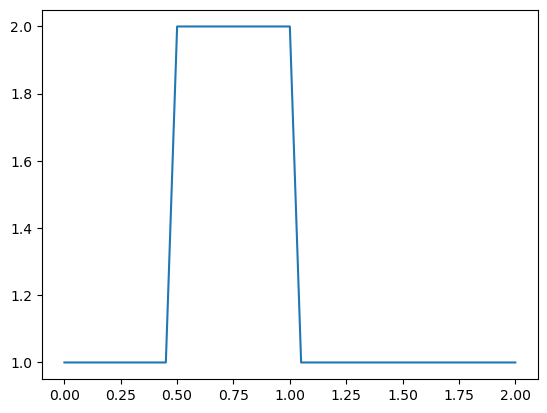

In [105]:
import numpy                       #here we load numpy
from matplotlib import pyplot, cm  #here we load matplotlib
import time, sys                   #and load some utilities
from celluloid import Camera
import sympy
from sympy import init_printing
init_printing(use_latex=True)
from sympy.utilities.lambdify import lambdify

nx = 41 
dx = 2 / (nx-1)
nt = 25    #nt is the number of timesteps we want to calculate
dt = .025  #dt is the amount of time each timestep covers (delta t)
c = 1      #assume wavespeed of c = 1

u = numpy.ones(nx)      #numpy function ones()
u[int(.5 / dx):int(1 / dx + 1)] = 2  #setting u = 2 between 0.5 and 1 as per our I.C.s
print(u)

pyplot.plot(numpy.linspace(0, 2, nx), u);

A hat function was obtained when the initial boundary condition given by the problem statement
was placed as shown below

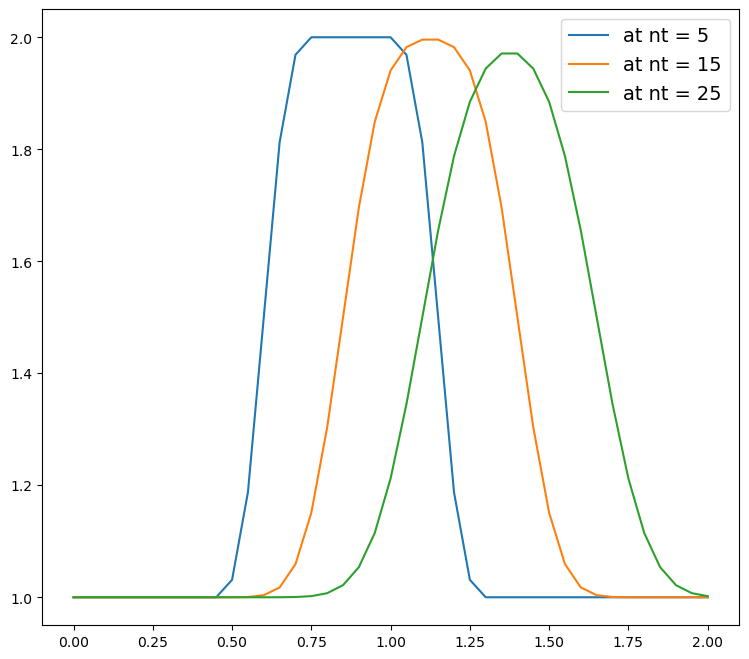

In [106]:
fig = pyplot.figure(figsize=(9,8))

def convec(nt):
    u = numpy.ones(nx) #numpy function ones()
    u[int(.5 / dx):int(1 / dx + 1)] = 2 #setting u = 2 between 0.5 and 1 as per our I.C.s
    un = numpy.ones(nx) #initialize a temporary array
    
    for n in range(nt): #loop for values of n from 0 to nt, so it will run nt times
        un = u.copy() ##copy the existing values of u into un
        
        for i in range(1, nx):
            u[i] = un[i] - c * dt / dx * (un[i] - un[i-1])
        
    pyplot.plot(numpy.linspace(0, 2, nx), u, label = "at nt = {}".format(nt))
    pyplot.legend(fontsize=14);

convec(5)
convec(15)
convec(25)

When the initial boundary conditions were set and placed in the model equation, a set of
convection plots are obtained at timestep of 25 units. As shown above, when the timestep for
which the equation solved is increases, the graph of the convection also moves towards right. As
well as moving along the x-axis, the width of the plot also decreases, narrowing the width of the
bulk and diverting away from the shape of a hat function to a parabolic shape because of the
linear system.

### Step 2: 1-D Nonlinear Convection

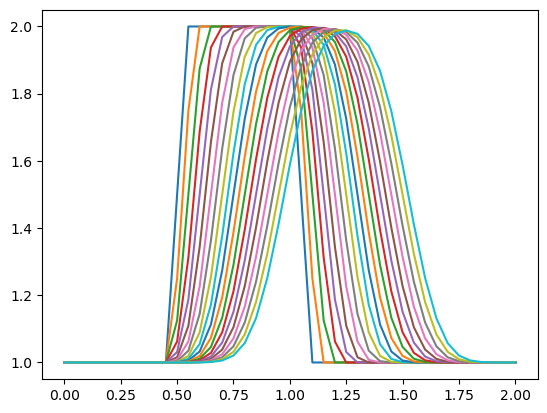

In [107]:
nx = 41
dx = 2 / (nx - 1)
nt = 20    #nt is the number of timesteps we want to calculate
dt = .025  #dt is the amount of time each timestep covers (delta t)
c=1
u = numpy.ones(nx)      #as before, we initialize u with every value equal to 1.
u[int(.5 / dx) : int(1 / dx + 1)] = 2  #then set u = 2 between 0.5 and 1 as per our I.C.s

un = numpy.ones(nx)
for n in range(nt):  
    un = u.copy() 
    for i in range(1, nx):  
        for i in range(nx): 
            u[i] = un[i] - c * dt / dx * (un[i] - un[i-1])



    
    pyplot.plot(numpy.linspace(0, 2, nx), u) ##Plot the results

In the nonlinear convection, the convection plots move along x-axis with the timestep value
being increased as shown in figure above, similar to the linear convection. However, the shape of the
plots becomes irregular along the x-axis, indicating the nonlinearity property of the plot.

### Step 3: 1-D Diffusion

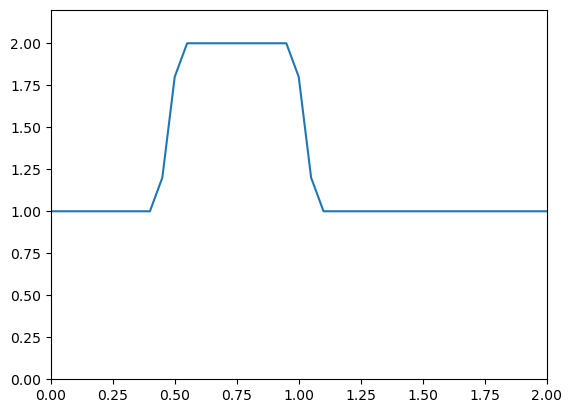

MovieWriter PillowWriter unavailable; using Pillow instead.


In [108]:
nu = 0.3
sigma = .2 #sigma is a parameter, we'll learn more about it later
dt = sigma * dx**2 / nu #dt is defined using sigma ... more later!

u = numpy.ones(nx)      #a numpy array with nx elements all equal to 1.
u[int(.5 / dx):int(1 / dx + 1)] = 2  #setting u = 2 between 0.5 and 1 as per our I.C.s

un = numpy.ones(nx) #our placeholder array, un, to advance the solution in time

fig=pyplot.figure()
camera=Camera(fig)
ax= pyplot.axes()
ax.set_ylim(0,2.2)
ax.set_xlim(0,2)

for n in range(nt):  #iterate through time
    un = u.copy() ##copy the existing values of u into un
    for i in range(1, nx - 1):
        u[i] = un[i] + nu * dt / dx**2 * (un[i+1] - 2 * un[i] + un[i-1])
    ax.plot(numpy.linspace(0, 2, nx), u)
    pyplot.pause(0.01)
    camera.snap()
animation=camera.animate()
animation.save("avash2.gif",writer="PillowWriter",fps=100)
pyplot.show()

In the diffusion model, instead of moving along a path, the material diffuses on other material.
As in figure above, it can be observed that as the timestep is increased, the cone shape of the plot
diffuses out to the whole x-axis. While diffusing, the shape of the graph is retended as there is no
nonlineratiy in the equation. Along with this, the peak of the material reduces and width
increases accordingly as increase in timestep value.

### Step 4: 1-D Burgers' Equation

#### Utilizing SymPy for Time Savings

In Burgers' Equation, evaluating the initial condition can be complex and prone to manual errors. The derivative $\frac{\partial \phi}{\partial x}$, while manageable, is susceptible to mistakes in manual computation. Therefore, we leverage SymPy, a symbolic math library for Python, to simplify this task. SymPy provides symbolic math functionality akin to Mathematica, with the added advantage of easy integration into Python calculations. By utilizing SymPy, we streamline the process and minimize the risk of errors in our calculations.


In [109]:
from sympy import init_printing
init_printing(use_latex=True)

x, nu, t = sympy.symbols('x nu t')
phi = (sympy.exp(-(x - 4 * t)**2 / (4 * nu * (t + 1))) + sympy.exp(-(x - 4 * t - 2 * sympy.pi)**2 / (4 * nu * (t + 1))))
phi

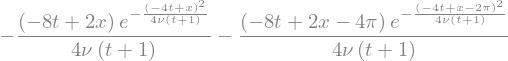

In [110]:
phiprime = phi.diff(x)
phiprime

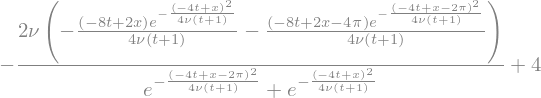

In [111]:
from sympy.utilities.lambdify import lambdify

u = -2 * nu * (phiprime / phi) + 4
u

In [112]:
ufunc = lambdify((t, x, nu), u)
print(ufunc(1, 4, 3))

3.49170664206445


#### Back to Burgers' Equation

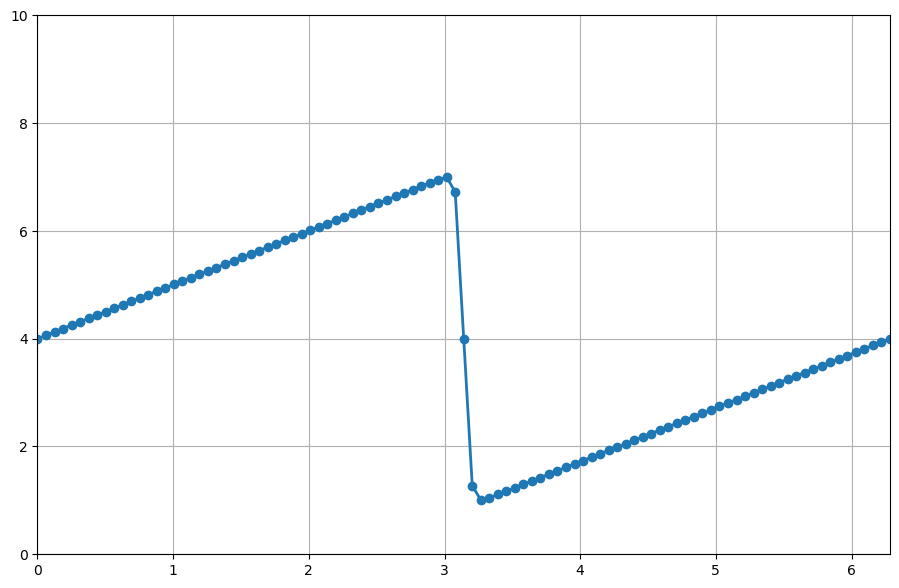

In [113]:
nx = 101
nt = 50
dx = 2 * numpy.pi / (nx - 1)
nu = .07
dt = dx * nu
x = numpy.linspace(0, 2 * numpy.pi, nx)
un = numpy.empty(nx)
t = 0
u = numpy.asarray([ufunc(t, x0, nu) for x0 in x])
pyplot.figure(figsize=(11, 7), dpi=100)
pyplot.plot(x, u, marker='o', lw=2)
pyplot.xlim([0, 2 * numpy.pi])
pyplot.ylim([0, 10])
pyplot.grid();

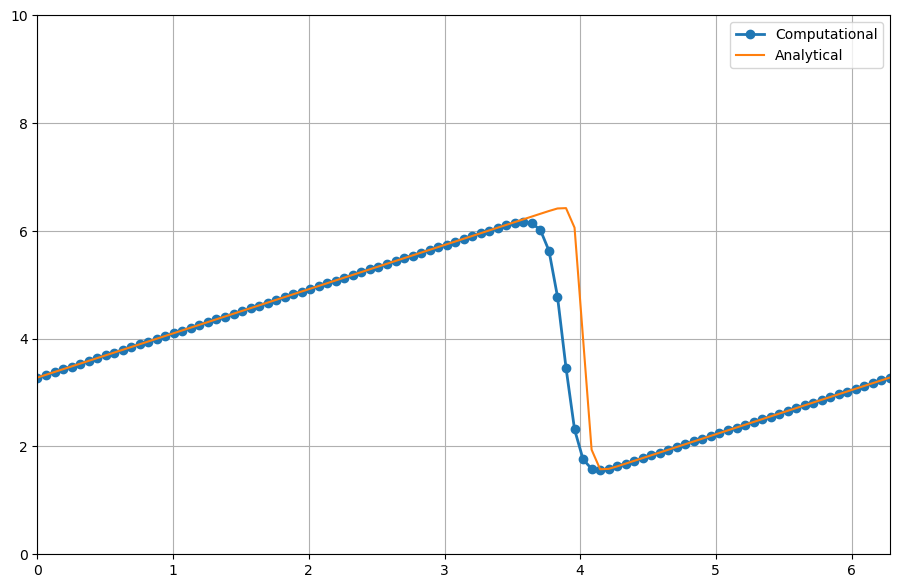

In [114]:
for n in range(nt):
    un = u.copy()
    for i in range(1, nx-1):
        u[i] = un[i] - un[i] * dt / dx *(un[i] - un[i-1]) + nu * dt / dx**2 *(un[i+1] - 2 * un[i] + un[i-1])
    u[0] = un[0] - un[0] * dt / dx * (un[0] - un[-2]) + nu * dt / dx**2 * (un[1] - 2 * un[0] + un[-2])
    u[-1] = u[0]
u_analytical = numpy.asarray([ufunc(nt * dt, xi, nu) for xi in x])

pyplot.figure(figsize=(11, 7), dpi=100)
pyplot.plot(x,u, marker='o', lw=2, label='Computational')
pyplot.plot(x, u_analytical, label='Analytical')
pyplot.xlim([0, 2 * numpy.pi])
pyplot.ylim([0, 10])
pyplot.grid()
pyplot.legend();

First figure above shows the initial condition to solve the Burger’s equation analytically. Since the
boundary condition was u(0)=u(2π), it is indicated in the figure as the end y value of the plot is
same as initial y value, ie. at t=0. While in second figure, the two plots represent the solution solved
anatytically (solid blue) and computationally (solid yellow) using the initial condition. In both
the plots of second figure, it is observed that the plots moved with the x-axis while the amplitude of the
graph is also smaller compared to first figure. This shows the presence of convection (moving in
direction of x-axis) and diffusion (decrease in the amplitude), which would indicate solving both
the convective and diffusive term present in the Burger’s equation.

### Step 5: 2-D Linear Convection

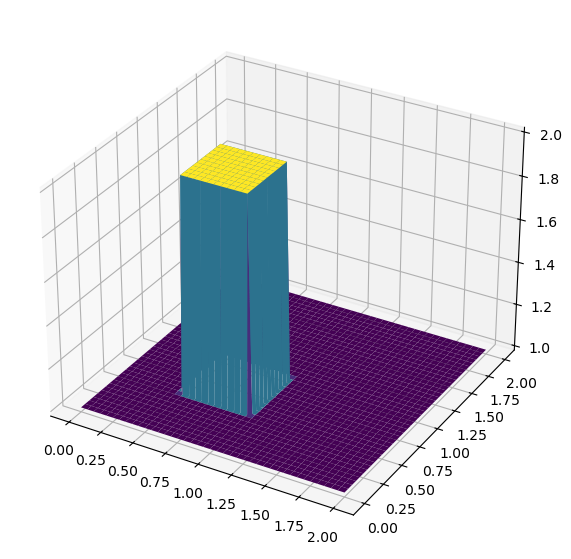

In [115]:
nx = 81
ny = 81
nt = 100
c = 1
dx = 2 / (nx - 1)
dy = 2 / (ny - 1)
sigma = .2
dt = sigma * dx
x = numpy.linspace(0, 2, nx)
y = numpy.linspace(0, 2, ny)

u = numpy.ones((ny, nx)) ##create a 1xn vector of 1's
un = numpy.ones((ny, nx)) ##

###Assign initial conditions

##set hat function I.C. : u(.5<=x<=1 && .5<=y<=1 ) is 2
u[int(.5 / dy):int(1 / dy + 1),int(.5 / dx):int(1 / dx + 1)] = 2

###Plot Initial Condition
fig = pyplot.figure(figsize=(11, 7), dpi=100)
ax = pyplot.axes(projection='3d')
X, Y = numpy.meshgrid(x, y)
surf = ax.plot_surface(X, Y, u[:], cmap=cm.viridis);

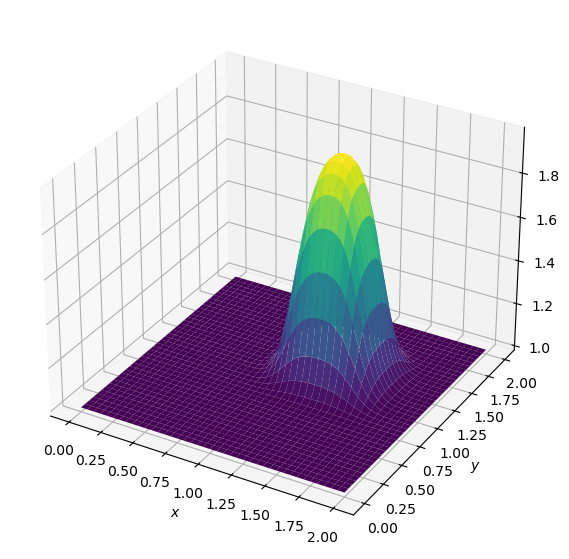

In [116]:
u = numpy.ones((ny, nx))
u[int(.5 / dy):int(1 / dy + 1), int(.5 / dx):int(1 / dx + 1)] = 2

u = numpy.ones((ny, nx))
u[int(.5 / dy):int(1 / dy + 1), int(.5 / dx):int(1 / dx + 1)] = 2

for n in range(nt + 1): ##loop across number of time steps
    un = u.copy()
    u[1:, 1:] = (un[1:, 1:] - (c * dt / dx * (un[1:, 1:] - un[1:, :-1])) -
    (c * dt / dy * (un[1:, 1:] - un[:-1, 1:])))
    u[0, :] = 1
    u[-1, :] = 1
    u[:, 0] = 1
    u[:, -1] = 1
    
fig = pyplot.figure(figsize=(11, 7), dpi=100)
ax = pyplot.subplot(projection='3d')
surf2 = ax.plot_surface(X, Y, u[:], cmap=cm.viridis)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$');

The 3d plot of the initial condition and the plot of the solved 2-D linear convection is shown in
above figures. The first plot shows the initial condition for the two dimensional convection. It is a
cuboid shaped graph which can be thought of a 3d plot of the hat function presented in 1-D linear
convection. The second plot presents the convection occurring in 2-D after timestep of 100
units. Similar to the initial condition plot, the plot of the convection also can be thought of 3d
plot of linear 1-D convection since the convection occurs in both x and y direction.

### Step 6: 2-D Nonlinear Convection

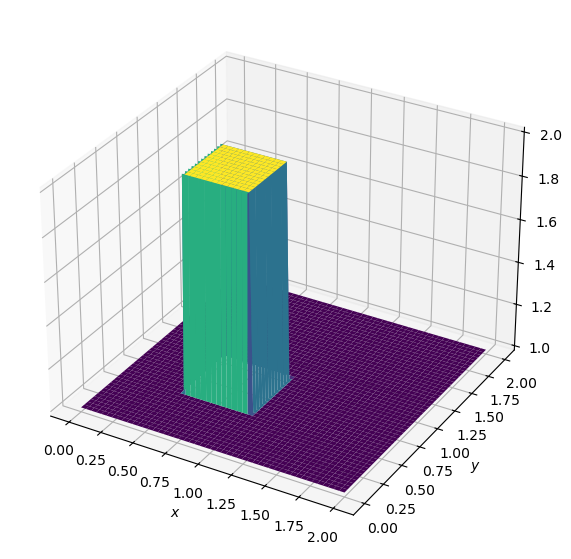

In [117]:
nx = 101
ny = 101
nt = 80
c = 1
dx = 2 / (nx - 1)
dy = 2 / (ny - 1)
sigma = .2
dt = sigma * dx

x = numpy.linspace(0, 2, nx)
y = numpy.linspace(0, 2, ny)

u = numpy.ones((ny, nx)) ##create a 1xn vector of 1's
v = numpy.ones((ny, nx))
un = numpy.ones((ny, nx))
vn = numpy.ones((ny, nx))

###Assign initial conditions
##set hat function I.C. : u(.5<=x<=1 && .5<=y<=1 ) is 2
u[int(.5 / dy):int(1 / dy + 1), int(.5 / dx):int(1 / dx + 1)] = 2
##set hat function I.C. : v(.5<=x<=1 && .5<=y<=1 ) is 2
v[int(.5 / dy):int(1 / dy + 1), int(.5 / dx):int(1 / dx + 1)] = 2

fig = pyplot.figure(figsize=(11, 7), dpi=100)
ax = pyplot.axes(projection='3d')
X, Y = numpy.meshgrid(x, y)

ax.plot_surface(X, Y, u, cmap=cm.viridis, rstride=2, cstride=2)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$');

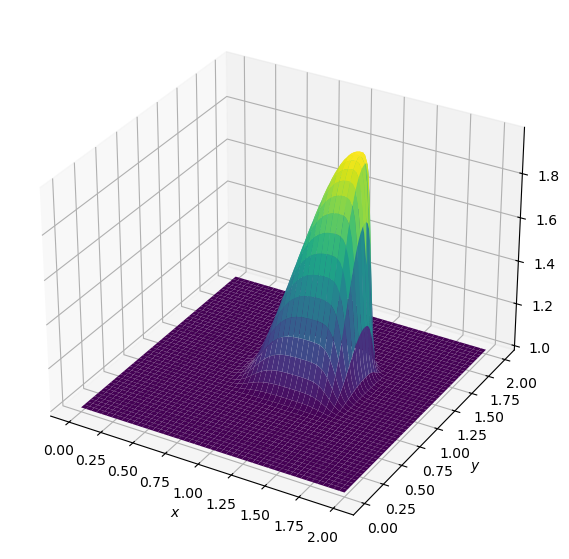

In [118]:
for n in range(nt + 1): ##loop across number of time steps
    un = u.copy()
    vn = v.copy()
    u[1:, 1:] = (un[1:, 1:] -
        (un[1:, 1:] * c * dt / dx * (un[1:, 1:] - un[1:, :-1])) -
        vn[1:, 1:] * c * dt / dy * (un[1:, 1:] - un[:-1, 1:]))
    v[1:, 1:] = (vn[1:, 1:] -
        (un[1:, 1:] * c * dt / dx * (vn[1:, 1:] - vn[1:, :-1])) -
        vn[1:, 1:] * c * dt / dy * (vn[1:, 1:] - vn[:-1, 1:]))
    u[0, :] = 1
    u[-1, :] = 1
    u[:, 0] = 1
    u[:, -1] = 1
    v[0, :] = 1
    v[-1, :] = 1
    v[:, 0] = 1
    v[:, -1] = 1
    
fig = pyplot.figure(figsize=(11, 7), dpi=100)
ax = pyplot.axes(projection='3d')
X, Y = numpy.meshgrid(x, y)

ax.plot_surface(X, Y, u, cmap=cm.viridis, rstride=2, cstride=2)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$');

For a 2-D nonlinear convection using the initial condition described above in 2-D linear convection, the graph of Fig 3.8 is
obtained. The initial cuboidal function changes to a changing gradient plot after the timestep of
80 units. Because of the nonlinearity, the plot is skewed and forms complex shape.

### Step 7: 2-D Diffusion

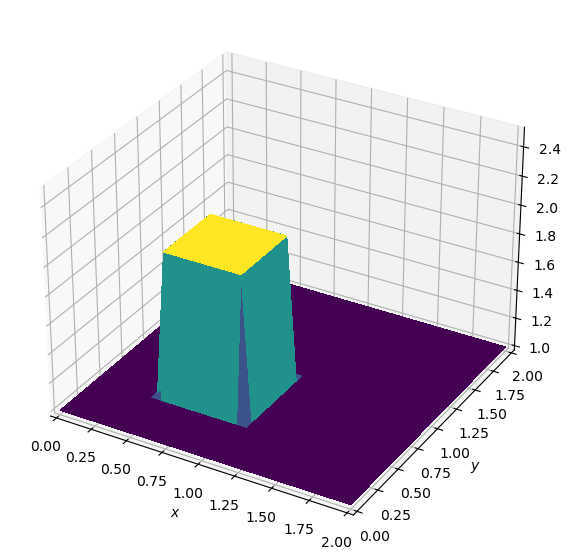

In [119]:
nx = 31
ny = 31
nt = 17
nu = .05
dx = 2 / (nx - 1)
dy = 2 / (ny - 1)
sigma = .25
dt = sigma * dx * dy / nu

x = numpy.linspace(0, 2, nx)
y = numpy.linspace(0, 2, ny)

u = numpy.ones((ny, nx)) # create a 1xn vector of 1's
un = numpy.ones((ny, nx))

###Assign initial conditions
# set hat function I.C. : u(.5<=x<=1 && .5<=y<=1 ) is 2
u[int(.5 / dy):int(1 / dy + 1),int(.5 / dx):int(1 / dx + 1)] = 2

fig = pyplot.figure(figsize=(11, 7), dpi=100)
ax = pyplot.axes(projection='3d')
X, Y = numpy.meshgrid(x, y)
surf = ax.plot_surface(X, Y, u, rstride=1, cstride=1, cmap=cm.viridis, linewidth=0, antialiased=False)

ax.set_xlim(0, 2)
ax.set_ylim(0, 2)
ax.set_zlim(1, 2.5)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$');

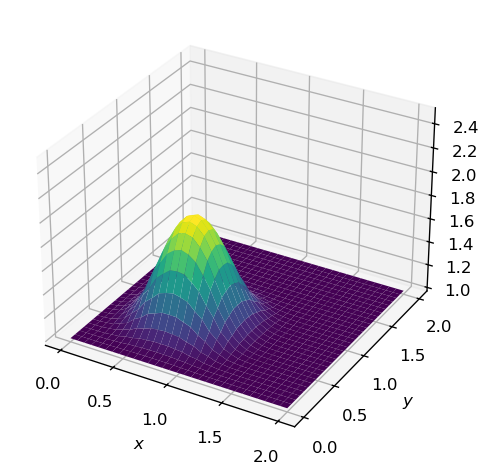

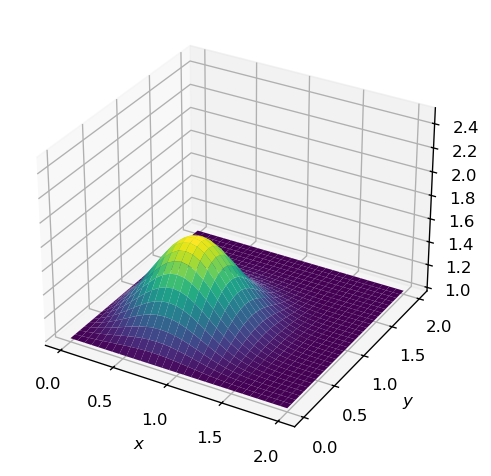

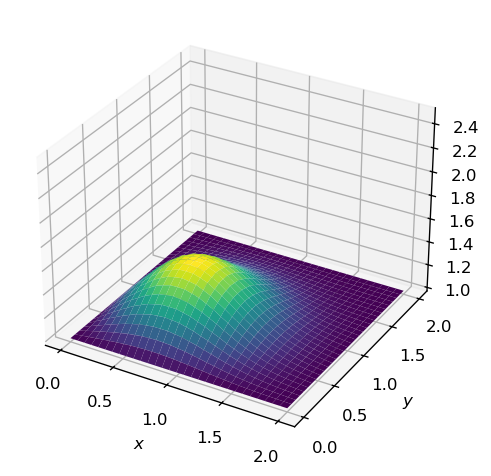

In [120]:
def diffuse(nt):
    u[int(.5 / dy):int(1 / dy + 1),int(.5 / dx):int(1 / dx + 1)] = 2
    for n in range(nt + 1):
        un = u.copy()
        u[1:-1, 1:-1] = (un[1:-1,1:-1] +
            nu * dt / dx**2 *
            (un[1:-1, 2:] - 2 * un[1:-1, 1:-1] + un[1:-1, 0:-2]) +
            nu * dt / dy**2 *
            (un[2:,1: -1] - 2 * un[1:-1, 1:-1] + un[0:-2, 1:-1]))
        u[0, :] = 1
        u[-1, :] = 1
        u[:, 0] = 1
        u[:, -1] = 1
    fig = pyplot.figure( dpi=120)
    ax = pyplot.axes(projection='3d')
    surf = ax.plot_surface(X, Y, u[:], rstride=1, cstride=1, cmap=cm.viridis,
    linewidth=0, antialiased=True)
    ax.set_zlim(1, 2.5)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$');
diffuse(10)
diffuse(24)
diffuse(50)

The graph of the initial condition for the 2-D diffusion was shown in first figure above. The initial
condition of the hat function was that the wave, u(0.5<=x<=1 and 0.5<=y<=1 ) is 2 which is
exactly represtned in the plot. Above three figure shows the diffusion process occurring with increasing
timestep. As there is no nonlinearity present, the plot retents its original shape, similar to 1-D
diffusion. With increasing timestep, the wave diffuses out to the base resulting in loss of peak
amplitude.

### Step 8: 2-D Burger's Equation

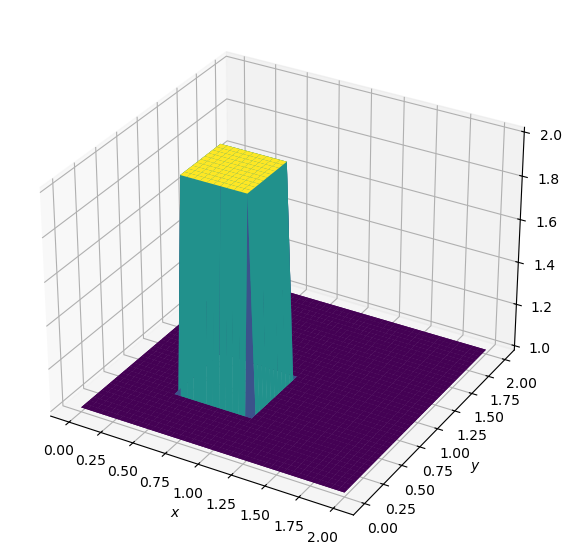

In [121]:
nx = 41
ny = 41
nt = 120
c = 1
dx = 2 / (nx - 1)
dy = 2 / (ny - 1)
sigma = .0009
nu = 0.01
dt = sigma * dx * dy / nu

x = numpy.linspace(0, 2, nx)
y = numpy.linspace(0, 2, ny)

u = numpy.ones((ny, nx)) # create a 1xn vector of 1's
v = numpy.ones((ny, nx))
un = numpy.ones((ny, nx))
vn = numpy.ones((ny, nx))
comb = numpy.ones((ny, nx))

###Assign initial conditions

##set hat function I.C. : u(.5<=x<=1 && .5<=y<=1 ) is 2
u[int(.5 / dy):int(1 / dy + 1),int(.5 / dx):int(1 / dx + 1)] = 2
##set hat function I.C. : u(.5<=x<=1 && .5<=y<=1 ) is 2
v[int(.5 / dy):int(1 / dy + 1),int(.5 / dx):int(1 / dx + 1)] = 2

fig = pyplot.figure(figsize=(11, 7), dpi=100)
ax = pyplot.axes(projection='3d')
X, Y = numpy.meshgrid(x, y)
ax.plot_surface(X, Y, u[:], cmap=cm.viridis, rstride=1, cstride=1)
ax.plot_surface(X, Y, v[:], cmap=cm.viridis, rstride=1, cstride=1)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$');

Like the previous section, the initial condition was produced and plotted which can be seen in above figure. This initial condition is implemented in 2-D Burger’s equation which contains both
diffusive and convective in two axis. The results of the graphs were produced in series of graphs.

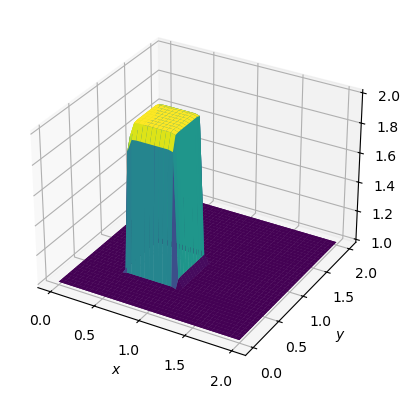

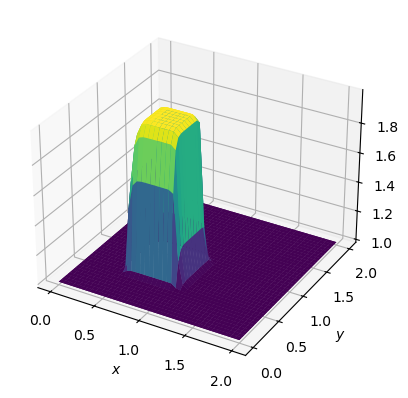

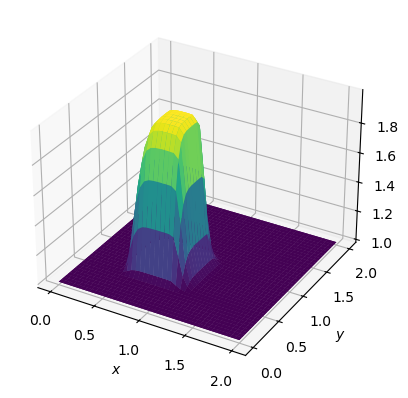

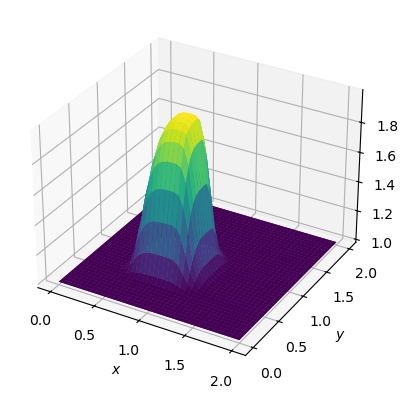

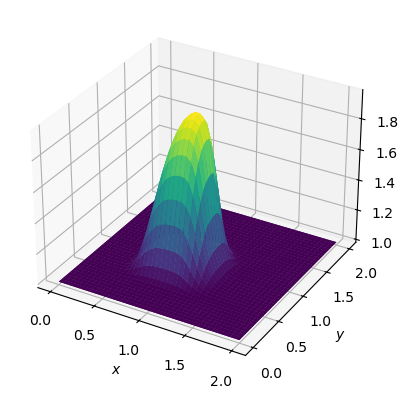

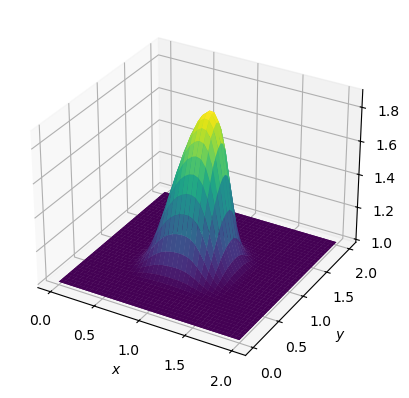

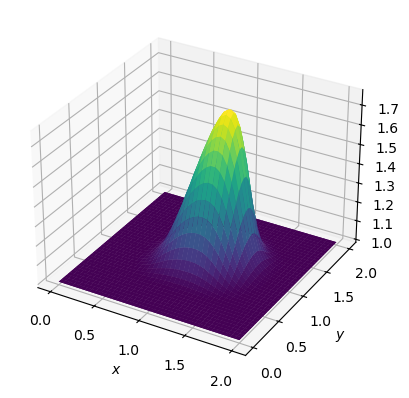

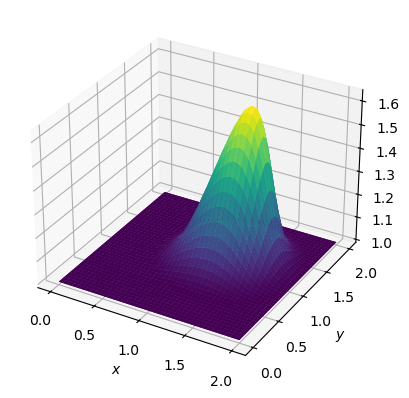

In [122]:
def burger(nt):
    for n in range(nt + 1): ##loop across number of time steps
        un = u.copy()
        vn = v.copy()
        u[1:-1, 1:-1] = (un[1:-1, 1:-1] -dt / dx * un[1:-1, 1:-1] *(un[1:-1, 1:-1] - un[1:-1, 0:-2]) -dt / dy * vn[1:-1, 1:-1] *(un[1:-1, 1:-1] - un[0:-2, 1:-1]) +nu * dt / dx**2 *(un[1:-1,2:] - 2 * un[1:-1, 1:-1] + un[1:-1, 0:-2]) +
                        nu * dt / dy**2 *
                        (un[2:, 1:-1] - 2 * un[1:-1, 1:-1] + un[0:-2, 1:-1]))
        v[1:-1, 1:-1] = (vn[1:-1, 1:-1] - dt / dx * un[1:-1, 1:-1] *(vn[1:-1, 1:-1] - vn[1:-1, 0:-2]) -dt / dy * vn[1:-1, 1:-1] *(vn[1:-1, 1:-1] - vn[0:-2, 1:-1]) +nu * dt / dx**2 *(vn[1:-1, 2:] - 2 * vn[1:-1, 1:-1] + vn[1:-1, 0:-2]) +nu * dt / dy**2 *(vn[2:, 1:-1] - 2 * vn[1:-1, 1:-1] + vn[0:-2, 1:-1]))
        u[0, :] = 1
        u[-1, :] = 1
        u[:, 0] = 1
        u[:, -1] = 1
        v[0, :] = 1
        v[-1, :] = 1
        v[:, 0] = 1
        v[:, -1] = 1
    fig = pyplot.figure(dpi=100)
    ax = pyplot.axes(projection='3d')
    X, Y = numpy.meshgrid(x, y)
    ax.plot_surface(X, Y, u[:], cmap=cm.viridis, rstride=1, cstride=1)
    ax.plot_surface(X, Y, v[:], cmap=cm.viridis, rstride=1, cstride=1)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$');
    
burger(10)
burger(40)
burger(100)
burger(150)
burger(200)
burger(300)
burger(450)
burger(550)

In first two graphs, the graphs to the result with timestep 40 (left) and 200 (right) is shown. Comparing
the plots, it can be seen as there is no convection at the early periods with diffusion dominating
the system. This is because of the nature of the initial condition which contains some localized
perturbation such as concentration gradient.
However, with the increase in timestep, the convective term appears to dominate with no
significant diffusion seems to appear. This is displayed in last graph with timestep values taken at
200, 300, 450 and 550 respectively. With this, the graphs appear to transport diagonally to the x
and y axis.

### Step 9: 2-D Laplace Equation

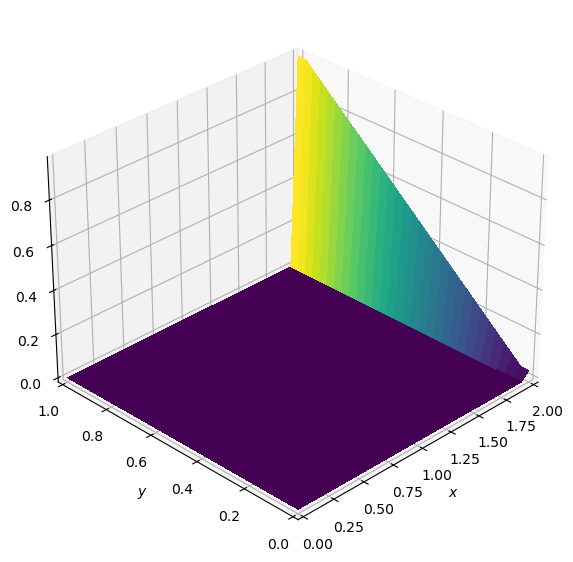

In [123]:
nx = 31
ny = 31
c = 1
dx = 2 / (nx - 1)
dy = 2 / (ny - 1)

##initial conditions
p = numpy.zeros((ny, nx)) # create a XxY vector of 0's

##plotting aids
x = numpy.linspace(0, 2, nx)
y = numpy.linspace(0, 1, ny)

##boundary conditions
p[:, 0] = 0 # p = 0 @ x = 0
p[:, -1] = y # p = y @ x = 2
p[0, :] = p[1, :] # dp/dy = 0 @ y = 0
p[-1, :] = p[-2, :] # dp/dy = 0 @ y = 1

def plot2D(x, y, p):
    fig = pyplot.figure(figsize=(11, 7), dpi=100)
    ax = pyplot.axes(projection='3d')
    X, Y = numpy.meshgrid(x, y)
    surf = ax.plot_surface(X, Y, p[:], rstride=1, cstride=1, cmap=cm.viridis,
    linewidth=0, antialiased=False)
    ax.set_xlim(0, 2)
    ax.set_ylim(0, 1)
    ax.view_init(30, 225)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')

plot2D(x,y,p)

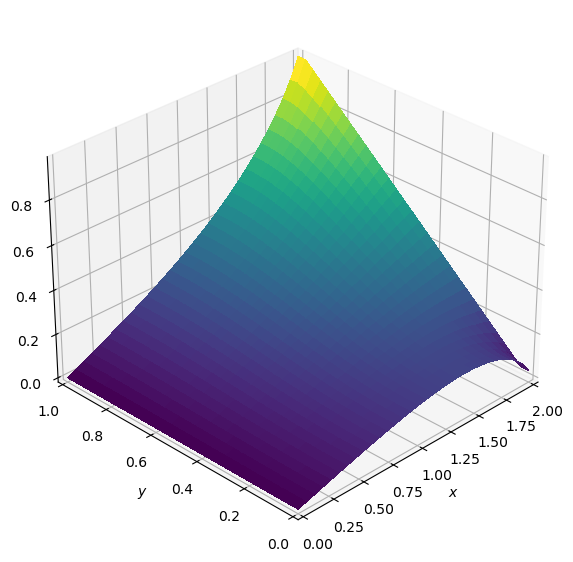

In [124]:
def laplace2d(p, y, dx, dy, l1norm_target):
    l1norm = 1
    pn = numpy.empty_like(p)
    while l1norm > l1norm_target:
        pn = p.copy()
        p[1:-1, 1:-1] = ((dy**2 * (pn[1:-1, 2:] + pn[1:-1, 0:-2]) + dx**2 * (pn[2:, 1:-1] + pn[0:-2, 1:-1])) /(2 * (dx**2 + dy**2)))
        p[:, 0] = 0 # p = 0 @ x = 0
        p[:, -1] = y # p = y @ x = 2
        p[0, :] = p[1, :] # dp/dy = 0 @ y = 0
        p[-1, :] = p[-2, :] # dp/dy = 0 @ y = 1
        l1norm = (numpy.sum(numpy.abs(p[:]) - numpy.abs(pn[:])) / numpy.sum(numpy.abs(pn[:])))
    return p

p= laplace2d(p,y,dx,dy,1e-4)
plot2D(x,y,p)

The first figure represents the initial conditions to solve the 2-D Laplace equation regarding pressure. In
the graph, it shows that the value of p is 0 all over the xy plane except the extreme of x-axis
where the value of p is y. So, we can see that gradient of the slope at the extreme increases
linearly with the value of y ie. the instantaneous hypotenous point of the triangle = y value at that
point.
The solution to the Laplace equation using the initial condition described above, the second figure is the
result obtained. There, we can observe that the value of p increases as the slope of the xy plane
increases. The p reaches a maximum point and then decreases to initial value moving along the
x-axis. The maximum value of p is determined by the convergence criteria given as l1norm
which measures the magnitude of plane from the origin. At the extreme of x-axis, the initial
condition provided is met as p = y when x =2, giving a linear slope.

### Step 10: 2-D Poisson Equation

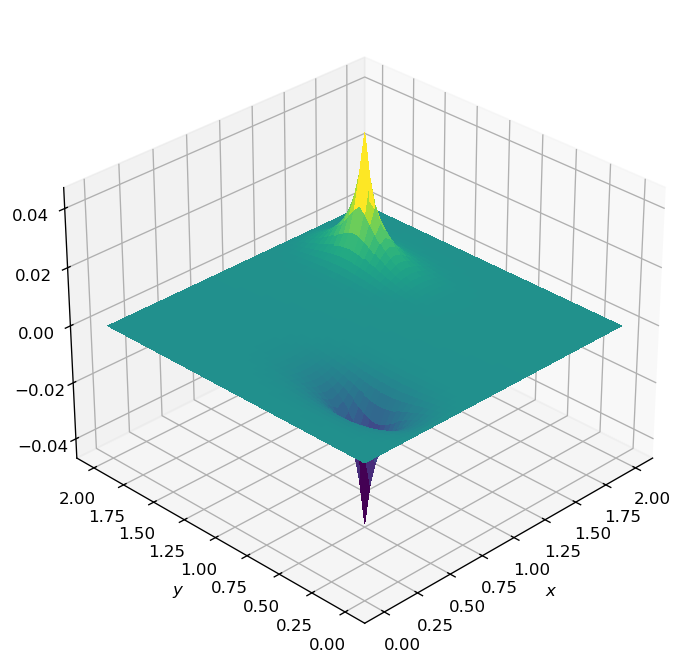

In [125]:
nx = 50
ny = 50
nt = 100
xmin = 0
xmax = 2
ymin = 0
ymax = 1

dx = (xmax - xmin) / (nx - 1)
dy = (ymax - ymin) / (ny - 1)

# Initialization
p = numpy.zeros((ny, nx))
pd = numpy.zeros((ny, nx))
b = numpy.zeros((ny, nx))
x = numpy.linspace(xmin, xmax, nx)
y = numpy.linspace(xmin, xmax, ny)

# Source
b[int(ny / 4), int(nx / 4)] = 100
b[int(3 * ny / 4), int(3 * nx / 4)] = -100

for it in range(nt):
    pd = p.copy()
    p[1:-1,1:-1] = (((pd[1:-1, 2:] + pd[1:-1, :-2]) * dy**2 +(pd[2:, 1:-1] + pd[:-2, 1:-1]) * dx**2 -b[1:-1, 1:-1] * dx**2 * dy**2) /(2 * (dx**2 + dy**2)))
    p[0, :] = 0
    p[ny-1, :] = 0
    p[:, 0] = 0
    p[:, nx-1] = 0


def plot2D(x, y, p):
    fig = pyplot.figure(figsize=(11, 7), dpi=120)
    ax = pyplot.axes(projection='3d')
    X, Y = numpy.meshgrid(x, y)
    surf = ax.plot_surface(X, Y, p[:], rstride=1, cstride=1, cmap=cm.viridis,linewidth=0, antialiased=False)
    ax.view_init(30, 225)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    
plot2D(x, y, p)

The solution of the Poisson equation as given above is similar to that obtained in 2D-Diffusion, Poisson equation is 2-D
pressure equation but they are equated to a source or a sink. This makes them unsteady state
system. In the figure, we can see that there is no p value change in the xy plane except for the
two spikes. The spikes are resulted by the source term ‘b’ which is assigned in both positive and
negative y axis.

### Step 11: Cavity Flow with Navier-Stokes

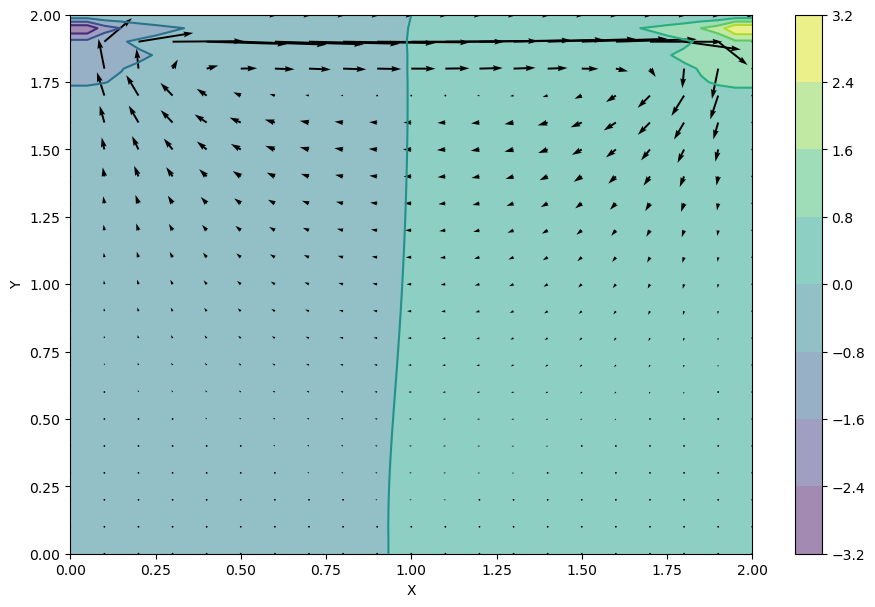

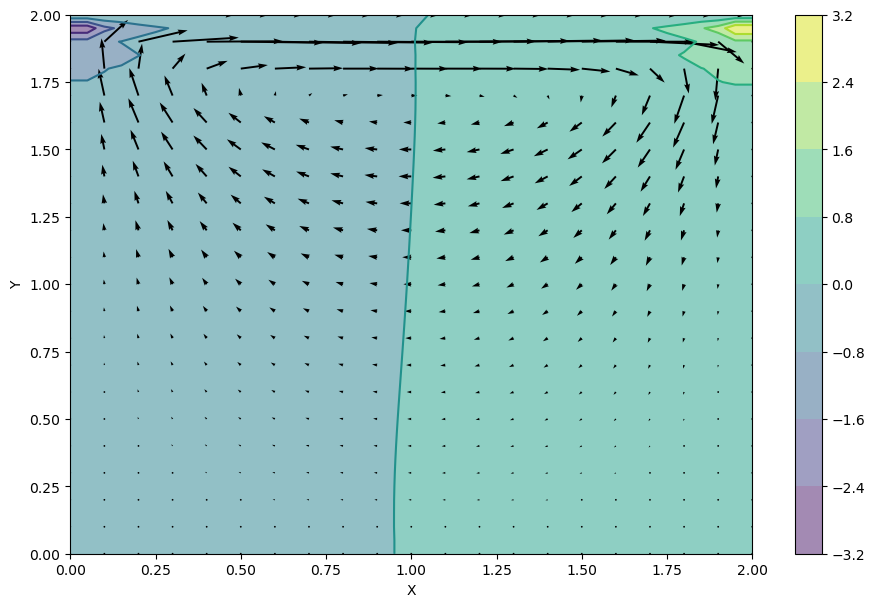

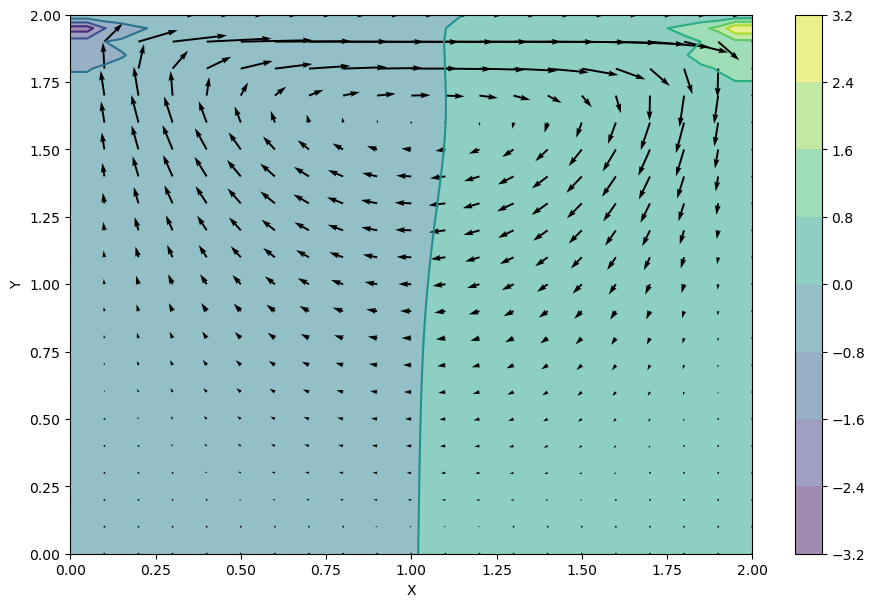

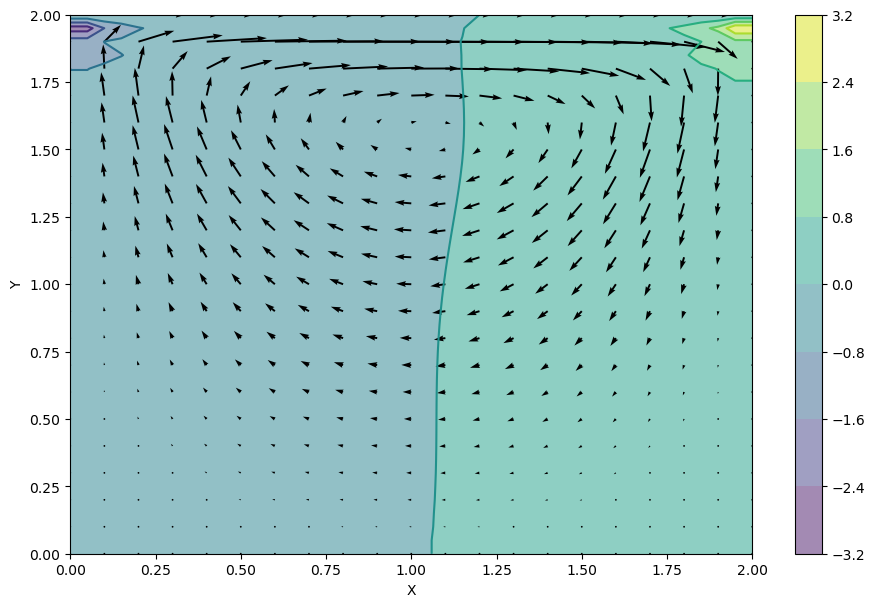

In [126]:
nx = 41
ny = 41
nt = 500
nit = 50
c = 1
dx = 2 / (nx - 1)
dy = 2 / (ny - 1)
x = numpy.linspace(0, 2, nx)
y = numpy.linspace(0, 2, ny)
X, Y = numpy.meshgrid(x, y)
rho = 1
nu = .1
dt = .001

def build_up_b(b, rho, dt, u, v, dx, dy):
    b[1:-1, 1:-1] = (rho * (1 / dt * ((u[1:-1, 2:] - u[1:-1, 0:-2]) / (2 * dx) + (v[2:, 1:-1] - v[0:-2, 1:-1]) / (2 * dy)) -((u[1:-1, 2:] - u[1:-1, 0:-2]) / (2 * dx))**2 -2 * ((u[2:, 1:-1] - u[0:-2, 1:-1]) / (2 * dy) *
    (v[1:-1, 2:] - v[1:-1, 0:-2]) / (2 * dx))- ((v[2:, 1:-1] - v[0:-2, 1:-1]) / (2 * dy))**2))
    return b

def pressure_poisson(p, dx, dy, b):
    pn = numpy.empty_like(p)
    pn = p.copy()
    for q in range(nit):
        pn = p.copy()
        p[1:-1, 1:-1] = (((pn[1:-1, 2:] + pn[1:-1, 0:-2]) * dy**2 +(pn[2:, 1:-1] + pn[0:-2, 1:-1]) * dx**2) /(2 * (dx**2 + dy**2)) -dx**2 * dy**2 / (2 * (dx**2 + dy**2)) *b[1:-1,1:-1])
        p[:, -1] = p[:, -2] # dp/dx = 0 at x = 2
        p[0, :] = p[1, :] # dp/dy = 0 at y = 0
        p[:, 0] = p[:, 1] # dp/dx = 0 at x = 0
        p[-1, :] = 0 # p = 0 at y = 2
    return p

def cavity_flow(nt, u, v, dt, dx, dy, p, rho, nu):
    un = numpy.empty_like(u)
    vn = numpy.empty_like(v)
    b = numpy.zeros((ny, nx))
    for n in range(nt):
        un = u.copy()
        vn = v.copy()
        b = build_up_b(b, rho, dt, u, v, dx, dy)
        p = pressure_poisson(p, dx, dy, b)
        u[1:-1, 1:-1] = (un[1:-1, 1:-1]- un[1:-1, 1:-1] * dt / dx *(un[1:-1, 1:-1] - un[1:-1, 0:-2]) -vn[1:-1, 1:-1] * dt / dy *(un[1:-1, 1:-1] - un[0:-2, 1:-1]) -dt / (2 * rho * dx) * (p[1:-1, 2:] - p[1:-1, 0:-2]) +nu * (dt / dx**2 * (un[1:-1, 2:] - 2 * un[1:-1, 1:-1] + un[1:-1, 0:-2]) + dt / dy**2 *(un[2:, 1:-1] - 2 * un[1:-1, 1:-1] + un[0:-2, 1:-1])))
        v[1:-1,1:-1] = (vn[1:-1, 1:-1] -un[1:-1, 1:-1] * dt / dx *(vn[1:-1, 1:-1] - vn[1:-1, 0:-2]) -vn[1:-1, 1:-1] * dt / dy *(vn[1:-1, 1:-1] - vn[0:-2, 1:-1]) -dt / (2 * rho * dy) * (p[2:, 1:-1] - p[0:-2, 1:-1]) +nu * (dt / dx**2 *(vn[1:-1, 2:] - 2 * vn[1:-1, 1:-1] + vn[1:-1, 0:-2]) +dt / dy**2 *(vn[2:, 1:-1] - 2 * vn[1:-1, 1:-1] + vn[0:-2, 1:-1])))
        u[0, :] = 0
        u[:, 0] = 0
        u[:, -1] = 0
        u[-1, :] = 1 # set velocity on cavity lid equal to 1
        v[0, :] = 0
        v[-1, :] = 0
        v[:, 0] = 0
        v[:, -1] = 0
    return u, v, p

def contour(nt):
    u = numpy.zeros((ny, nx))
    v = numpy.zeros((ny, nx))
    p = numpy.zeros((ny, nx))
    b = numpy.zeros((ny, nx))
    u, v, p = cavity_flow(nt, u, v, dt, dx, dy, p, rho, nu)
    
    fig = pyplot.figure(figsize=(11,7), dpi=100)
    # plotting the pressure field as a contour
    pyplot.contourf(X, Y, p, alpha=0.5, cmap=cm.viridis)
    pyplot.colorbar()
    # plotting the pressure field outlines
    pyplot.contour(X, Y, p, cmap=cm.viridis)
    # plotting velocity field
    pyplot.quiver(X[::2, ::2], Y[::2, ::2], u[::2, ::2], v[::2, ::2])
    pyplot.xlabel('X')
    pyplot.ylabel('Y')
    pyplot.show()
    
contour(100)
contour(200)
contour(500)
contour(750)

The first result shows the flow pattern with the two pressure distribution in the cavity flow. As given in
the initial condition, the top most part of y-axis (the lid) has value of velocity 1 and elsewhere 0,
the quivers show a flow. At the timestep value of 200 units, the unstedy flow shows
that while the upper part have a circular (eddy) flow movement, the bottom part has no
involvement. The flow movement is circular in a clockwise direction because the pressure of left
hand region is lower compared to right hand region shown by the color scheme.
The second figure shows the streamlines of the velocity vectors at timestep 500 (left) and 750 (right). As
the time is increased, a more smoother streamline is presented with shift in the pressure
distribution as well. The time increase also presents a vortex formation at around (1.1, 1,7)
coordinates.

### Step 12: Channel Flow with Navier-Stokes

499


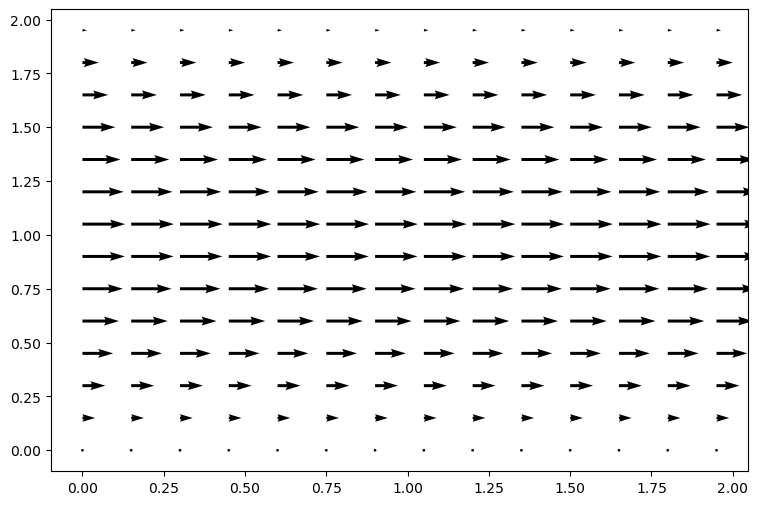

In [127]:
##variable declarations
nx = 41
ny = 41
nt = 10
nit = 50
c = 1
dx = 2 / (nx - 1)
dy = 2 / (ny - 1)
x = numpy.linspace(0, 2, nx)
y = numpy.linspace(0, 2, ny)
X, Y = numpy.meshgrid(x, y)

##physical variables
rho = 1
nu = .1
F = 1
dt = .01

#initial conditions
u = numpy.zeros((ny, nx))
un = numpy.zeros((ny, nx))
v = numpy.zeros((ny, nx))
vn = numpy.zeros((ny, nx))
p = numpy.ones((ny, nx))
pn = numpy.ones((ny, nx))
b = numpy.zeros((ny, nx))

def build_up_b(rho, dt, dx, dy, u, v):
    b = numpy.zeros_like(u)
    b[1:-1, 1:-1] = (rho * (1 / dt * ((u[1:-1, 2:] - u[1:-1, 0:-2]) / (2 * dx) +(v[2:, 1:-1] - v[0:-2, 1:-1]) / (2 * dy)) -((u[1:-1, 2:] - u[1:-1, 0:-2]) / (2 * dx))**2 -2 * ((u[2:, 1:-1] - u[0:-2, 1:-1]) / (2 * dy) *(v[1:-1, 2:] - v[1:-1, 0:-2]) / (2 * dx))-((v[2:, 1:-1] - v[0:-2, 1:-1]) / (2 * dy))**2))
    
    # Periodic BC Pressure @ x = 2
    b[1:-1, -1] = (rho * (1 / dt * ((u[1:-1, 0] - u[1:-1,-2]) / (2 * dx) +(v[2:, -1] - v[0:-2, -1]) / (2 * dy)) -((u[1:-1, 0] - u[1:-1, -2]) / (2 * dx))**2 -2 * ((u[2:, -1] - u[0:-2, -1]) / (2 * dy) *(v[1:-1, 0] - v[1:-1, -2]) / (2 * dx)) -((v[2:, -1] - v[0:-2, -1]) / (2 * dy))**2))
    
    # Periodic BC Pressure @ x = 0
    b[1:-1, 0] = (rho * (1 / dt * ((u[1:-1, 1] - u[1:-1, -1]) / (2 * dx) +(v[2:, 0] - v[0:-2, 0]) / (2 * dy)) -((u[1:-1, 1] - u[1:-1, -1]) / (2 * dx))**2 -2 * ((u[2:, 0] - u[0:-2, 0]) / (2 * dy) *(v[1:-1, 1] - v[1:-1, -1]) / (2 * dx))-((v[2:, 0] - v[0:-2, 0]) / (2 * dy))**2))
    return b

def pressure_poisson_periodic(p, dx, dy):
    pn = numpy.empty_like(p)
    for q in range(nit):
        pn = p.copy()
        p[1:-1, 1:-1] = (((pn[1:-1, 2:] + pn[1:-1, 0:-2]) * dy**2 +(pn[2:, 1:-1] + pn[0:-2, 1:-1]) * dx**2) /(2 * (dx**2 + dy**2)) -dx**2 * dy**2 / (2 * (dx**2 + dy**2)) * b[1:-1, 1:-1])
        
        # Periodic BC Pressure @ x = 2
        p[1:-1, -1] = (((pn[1:-1, 0] + pn[1:-1, -2])* dy**2 +(pn[2:, -1] + pn[0:-2, -1]) * dx**2) /(2 * (dx**2 + dy**2)) -dx**2 * dy**2 / (2 * (dx**2 + dy**2)) * b[1:-1, -1])
        
        # Periodic BC Pressure @ x = 0
        p[1:-1, 0] = (((pn[1:-1, 1] + pn[1:-1, -1])* dy**2 +(pn[2:, 0] + pn[0:-2, 0]) * dx**2) /(2 * (dx**2 + dy**2)) -dx**2 * dy**2 / (2 * (dx**2 + dy**2)) * b[1:-1, 0])
        
        # Wall boundary conditions, pressure
        p[-1, :] =p[-2, :] # dp/dy = 0 at y = 2
        p[0, :] = p[1, :] # dp/dy = 0 at y = 0
    return p

udiff = 1
stepcount = 0
while udiff > .001:
    un = u.copy()
    vn = v.copy()
    
    b = build_up_b(rho, dt, dx, dy, u, v)
    p = pressure_poisson_periodic(p, dx, dy)
    
    u[1:-1, 1:-1] = (un[1:-1, 1:-1] -un[1:-1, 1:-1] * dt / dx *(un[1:-1, 1:-1] - un[1:-1, 0:-2]) -vn[1:-1, 1:-1] * dt / dy *(un[1:-1, 1:-1] - un[0:-2, 1:-1]) -dt / (2 * rho * dx) *(p[1:-1, 2:] - p[1:-1, 0:-2]) +nu * (dt / dx**2 *(un[1:-1, 2:] - 2 * un[1:-1, 1:-1] + un[1:-1, 0:-2]) +dt / dy**2 *(un[2:, 1:-1] - 2 * un[1:-1, 1:-1] + un[0:-2, 1:-1])) +F * dt)
    
    v[1:-1, 1:-1] = (vn[1:-1, 1:-1] -un[1:-1, 1:-1] * dt / dx *(vn[1:-1, 1:-1] - vn[1:-1, 0:-2]) -vn[1:-1, 1:-1] * dt / dy *(vn[1:-1, 1:-1] - vn[0:-2, 1:-1]) -dt / (2 * rho * dy) *(p[2:, 1:-1] - p[0:-2, 1:-1]) +nu * (dt / dx**2 *(vn[1:-1, 2:] - 2 * vn[1:-1, 1:-1] + vn[1:-1, 0:-2]) +dt / dy**2 *(vn[2:, 1:-1] - 2 * vn[1:-1, 1:-1] + vn[0:-2, 1:-1])))
    
    # Periodic BC u @ x = 2
    u[1:-1, -1] = (un[1:-1, -1] - un[1:-1, -1] * dt / dx *(un[1:-1, -1] - un[1:-1, -2]) -vn[1:-1, -1] * dt / dy *(un[1:-1, -1] - un[0:-2, -1]) -dt / (2 * rho * dx) *(p[1:-1, 0] - p[1:-1, -2]) +nu * (dt / dx**2 *(un[1:-1, 0] - 2 * un[1:-1,-1] + un[1:-1, -2]) +dt / dy**2 *(un[2:, -1] - 2 * un[1:-1, -1] + un[0:-2, -1])) + F * dt)
    
    # Periodic BC u @ x = 0
    u[1:-1, 0] = (un[1:-1, 0] - un[1:-1, 0] * dt / dx *(un[1:-1, 0] - un[1:-1, -1]) -vn[1:-1, 0] * dt / dy *(un[1:-1, 0] - un[0:-2, 0]) -dt / (2 * rho * dx) *(p[1:-1, 1] - p[1:-1, -1]) +nu * (dt / dx**2 *(un[1:-1, 1] - 2 * un[1:-1, 0] + un[1:-1, -1]) +dt / dy**2 *(un[2:, 0] - 2 * un[1:-1, 0] + un[0:-2, 0])) + F * dt)
    
    # Periodic BC v @ x = 2
    v[1:-1, -1] = (vn[1:-1, -1] - un[1:-1, -1] * dt / dx *(vn[1:-1, -1] - vn[1:-1, -2]) -vn[1:-1, -1] * dt / dy *(vn[1:-1, -1] - vn[0:-2, -1]) -dt / (2 * rho * dy) *(p[2:, -1] - p[0:-2, -1]) +nu * (dt / dx**2 *(vn[1:-1, 0] - 2 * vn[1:-1, -1] + vn[1:-1, -2]) +dt / dy**2 *(vn[2:, -1] - 2 * vn[1:-1, -1] + vn[0:-2, -1])))
    
    # Periodic BC v @ x = 0
    v[1:-1, 0] = (vn[1:-1, 0] - un[1:-1, 0] * dt / dx *(vn[1:-1, 0] - vn[1:-1, -1]) -vn[1:-1, 0] * dt / dy *(vn[1:-1, 0] - vn[0:-2, 0]) -dt / (2 * rho * dy) *(p[2:, 0] - p[0:-2, 0]) +nu * (dt / dx**2 *(vn[1:-1, 1] - 2 * vn[1:-1, 0] + vn[1:-1, -1]) +dt / dy**2 *(vn[2:, 0] - 2 * vn[1:-1, 0] + vn[0:-2, 0])))
    
    # Wall BC: u,v = 0 @ y = 0,2
    u[0, :] = 0
    u[-1, :] = 0
    v[0, :] = 0
    v[-1, :]=0
    udiff = (numpy.sum(u) - numpy.sum(un)) / numpy.sum(u)
    stepcount += 1
print(stepcount)


fig = pyplot.figure(figsize = (9,6), dpi=100)
pyplot.quiver(X[::3, ::3], Y[::3, ::3], u[::3, ::3], v[::3, ::3]);

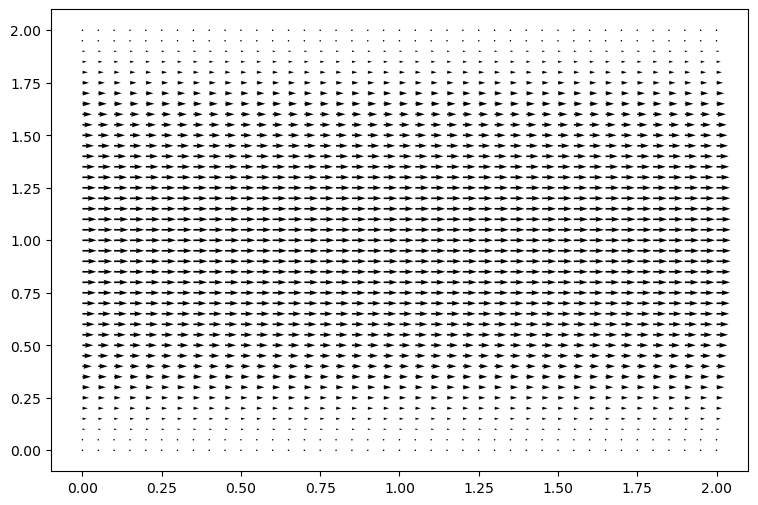

In [128]:
fig = pyplot.figure(figsize = (9,6), dpi=100)
pyplot.quiver(X, Y, u, v);

The movement of the flow simulated in a channel is presented in Fig 3.19. The figure represents
the movement of fluid in channel with no flow at the ends of the channel, ie. y = 0, 2. This is
described by the no-slip condition. There x-axis velocity of the fluid is constant as the value of F
is a constant along the x-axis. The velocity is maximum at y = 1 as it is the midpoint of the
channel in y-axis. The velocity decreases from the maximum value moving along the radial
direction in both positive and negative domain.

### Conclusion

The 12 Steps of CFD briefs on the introduction to Python for numerical computing of the Navier
Stokes equation. The module guides step-by-step through the programming of a finite difference
solution to the two-dimensional Navier-Stokes problem. The first four phases cover linear
convection, non-linear convection, diffusion, and Burgers' equation with a periodic boundary
condition. Steps 5 to 10 are in two dimensions and cover linear and nonlinear convection,
diffusion, Burgers' equation, Laplace equation and Poisson equation. The final two steps provide
the simulation of the fluid in cavity flow and channel flow by finite differencing the 2D Navier
Stokes equation as well as a Poisson equation representing pressure distribution PDE.